In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import mahotas
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import classification_report

In [2]:
files=[]
for dirname, _, filenames in os.walk('C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/'):
    for filename in filenames:
        if '.db' not in filename:
            files.append(os.path.join(dirname,filename))
#os.getcwd()

In [3]:
len(files)

27558

In [4]:
Parasitized_Dir='C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized/'
Uninfected_Dir='C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected/'

In [5]:
pd.DataFrame(files).sample(frac=1).reset_index(drop=True)

0
0      C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Te...
1      C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Te...
2      C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Te...
3      C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Te...
4      C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Te...
...                                                  ...
27553  C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Te...
27554  C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Te...
27555  C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Te...
27556  C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Te...
27557  C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Te...

[27558 rows x 1 columns]

In [6]:
from sklearn.model_selection import train_test_split
class DetectMalaria:
    def __init__(self,para_dir,uninfect_dir):
        self.parasitized_dir=para_dir
        self.uninfected_dir=uninfect_dir
    def dataset(self,ratio,files):
        Dataset=pd.DataFrame(files,columns=['Path'])
        Dataset=Dataset.sample(frac=1).reset_index(drop=True)  
        trainfiles,testfiles=train_test_split(Dataset,test_size=ratio,random_state=None)
        return(trainfiles,testfiles)

In [7]:
x=DetectMalaria(Parasitized_Dir,Uninfected_Dir)

In [8]:
train_data,test_data=x.dataset(ratio=0.25,files=files)

In [9]:
def label(df):
    if 'Uninfected' in df:
        return 0
    else:
        return 1


train_data['label']=train_data['Path'].apply(label)
test_data['label']=test_data['Path'].apply(label)



In [10]:
train_data.shape

(20668, 2)

### Visualizing image

(142, 121, 3)
Resized Dimensions :  (127, 127, 3)


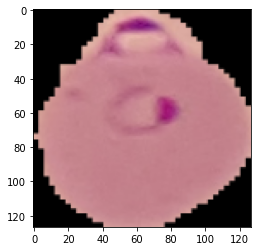

In [11]:
image=cv2.imread('C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152257_cell_146.png')
print(image.shape)

resized = cv2.resize(image, (127,127), interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',resized.shape)

image_rgb=cv2.cvtColor(resized,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

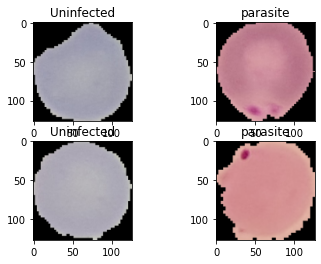

In [12]:
import random


fig,ax=plt.subplots(2,2)

for i,axes in enumerate(ax.flatten()):
    image_path=random.choice(train_data['Path'].reset_index(drop=True))
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image_rgb = cv2.resize(image, (127,127), interpolation = cv2.INTER_AREA)
    axes.imshow(image_rgb)
    if 'Uninfected' in image_path:
        axes.set_title('Uninfected')
    else:
        axes.set_title('parasite')
plt.show()

### Haralick features for one image

[ 1.05673712e-03  7.81656549e-09  2.30478090e-12  2.26792252e-13
  6.50951718e-26 -1.70486590e-17  1.50492131e-25]
[ 4.24885942e-02  3.58859369e+02  9.53684511e-01  3.88404173e+03
  6.41430002e-01  2.48598985e+02  1.51773076e+04  5.51921189e+00
  6.77110694e+00  1.75803100e-03  2.30602196e+00 -5.30821783e-01
  9.95972922e-01]


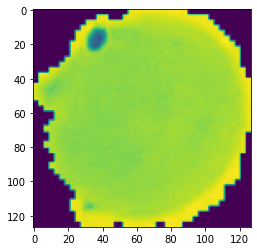

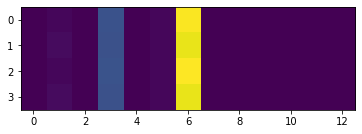

In [13]:
image_gray= cv2.cvtColor(image_rgb,cv2.COLOR_BGR2GRAY)
feature=cv2.HuMoments(cv2.moments(image_gray)).flatten()
print(feature)
print(mahotas.features.haralick(image_gray).mean(axis=0))
plt.imshow(image_gray)
plt.show()
plt.imshow(mahotas.features.haralick(image_gray))

### Functions to find the Haralick features and the Hu moments of the images

In [14]:
def cal_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature
def cal_haralick(image): 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick
 

### Applying the functions onto the train and test sets

In [15]:
feature=[]
def dataframe(df):
        
    image=cv2.imread(df['Path'])
    print(df['Path'])
    global_feature = np.hstack([ cal_haralick(image),cal_hu_moments(image),df['label']]) 
    feature.append(global_feature)


train_data.apply(dataframe,axis=1);

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_151551_cell_171.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_141504_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C159P120ThinF_IMG_20151115_185541_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C64P25N_ThinF_IMG_20150818_152455_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_121303_cell_124.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C212ThinF_IMG_20151106_105437_cell_273.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C63P24N_ThinF_IMG_20150818_143423_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C175P136NThinF_IMG_20151127_14142

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_142334_cell_33.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_131030_cell_162.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C138P99ThinF_IMG_20151005_173241_cell_40.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C2NThinF_IMG_20150604_114751_cell_221.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_122708_cell_148.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163702_cell_199.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151701_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C125P86ThinF_IMG_20151004_101929_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C68P29N_ThinF_IMG_20150819_134504_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104334_cell_30.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171739_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C183P144NThinF_IMG_20151201_223758_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C69P30N_ThinF_IMG_20150819_135613_cell_240.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_130408_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133703_cell_104.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C76P37ThinF_IMG_20150815_17121

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C131P92ThinF_IMG_20151004_145224_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151239_cell_81.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C155P116ThinF_IMG_20151115_143156_cell_142.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C56P17thinF_IMG_20150728_160623_cell_90.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C151P112ThinF_IMG_20151115_122342_cell_238.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C221ThinF_IMG_20151106_155857_cell_57.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C181P142ThinF_IMG_20151127_155722_cell_155.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_110608_cell_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C146P107ThinF_IMG_20151018_134554_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_121808_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C62P23N_ThinF_IMG_20150818_132918_cell_28.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C65P26N_ThinF_IMG_20150818_154436_cell_101.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C234ThinF_IMG_20151112_162759_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_145555_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C63P24N_ThinF_IMG_20150818_144456_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104440_cell_20.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C174P135NThinF_IMG_20151127_135311_cell_58.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134306_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C232ThinF_IMG_20151112_154251_cell_276.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C214ThinF_IMG_20151106_114611_cell_119.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C179P140ThinF_IMG_20151127_153852_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C222ThinF_IMG_20151115_150057_cell_148.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C218ThinF_IMG_20151106_144337_cell_165.png
C:

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110352_cell_108.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C174P135NThinF_IMG_20151127_135435_cell_141.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_113842_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105346_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C176P137NThinF_IMG_20151201_120845_cell_118.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C33P1thinF_IMG_20150619_121300a_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171448_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C125P86ThinF_IMG_201

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C206ThinF_IMG_20151029_141047_cell_66.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C175P136NThinF_IMG_20151127_142009_cell_17.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C66P27N_ThinF_IMG_20150818_163551_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C168P129ThinF_IMG_20151118_160845_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C168P129ThinF_IMG_20151118_160516_cell_105.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134112_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C151P112ThinF_IMG_20151115_121843_cell_113.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C93P54ThinF_IMG_20150821_163452_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C210ThinF_IMG_20151029_162439_cell_243.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C59P20thinF_IMG_20150803_111333_cell_109.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C101P62ThinF_IMG_20150923_170344_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C87P48ThinF_IMG_20150820_141913_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C132P93ThinF_IMG_20151004_152045_cell_88.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C157P118ThinF_IMG_20151115_163915_cell_172.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C73P34_ThinF_IMG_20150815_111501_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C144P105ThinF_IMG_20151015_163432_cell_302.p

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C91P52ThinF_IMG_20150821_124504_cell_70.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_110725_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C46P7ThinF_IMG_20151130_210743_cell_157.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C215ThinF_IMG_20151106_133247_cell_214.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151239_cell_82.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C168P129ThinF_IMG_20151118_160516_cell_180.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C52P13thinF_IMG_20150725_125847_cell_171.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C155P116ThinF_IMG_20151115_142805_cell_17

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C39P4thinF_original_IMG_20150622_110352_cell_24.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C139P100ThinF_IMG_20151005_183521_cell_142.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C96P57ThinF_IMG_20150824_105445_cell_200.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C125P86ThinF_IMG_20151004_102013_cell_45.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134504_cell_135.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C77P38ThinF_IMG_20150602_143650_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C99P60ThinF_IMG_20150918_141520_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C187P148NThinF_IMG_20151203_154111

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C89P50ThinF_IMG_20150820_162153_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C181P142ThinF_IMG_20151127_155722_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C82P43ThinF_IMG_20150817_123824_cell_37.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C178P139NThinF_IMG_20151201_154735_cell_30.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_110608_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103637_cell_151.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C139P100ThinF_IMG_20151005_183521_cell_116.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C87P48ThinF_IMG_20150820_132514_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104030_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C72P33_ThinF_IMG_20150815_105823_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C182P143NThinF_IMG_20151201_171950_cell_148.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C211ThinF_IMG_20151029_163959_cell_43.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_154351_cell_101.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C131P92ThinF_IMG_20151004_151126_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_163901_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_144449_cell_19.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C68P29N_ThinF_IMG_20150819_133447_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C157P118ThinF_IMG_20151115_162818_cell_188.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C216ThinF_IMG_20151106_134733_cell_87.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C109P70ThinF_IMG_20150930_102716_cell_33.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C155P116ThinF_IMG_20151115_142805_cell_195.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141351_cell_97.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C119P80ThinF_IMG_20151002_123608_cell_141.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C120P81ThinF_IMG_20151002_131120_cell_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C104P65ThinF_IMG_20150918_172247_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C182P143NThinF_IMG_20151201_172524_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C134P95ThinF_IMG_20151005_121425_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C66P27N_ThinF_IMG_20150818_164408_cell_17.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_154243_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133447_cell_172.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C227ThinF_IMG_20151112_135308_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C111P72ThinF_IMG_20150930_112609_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C90P51ThinF_IMG_20150821_115700_cell_87.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C240ThinF_IMG_20151127_115545_cell_207.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C107P68ThinF_IMG_20150924_221632_cell_179.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163702_cell_192.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_143743_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C123P84ThinF_IMG_20151002_151432_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C202ThinF_IMG_20151015_151254_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C158P119ThinF_IMG_20151115_181558_cell_9.pn

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C46P7ThinF_IMG_20151130_210743_cell_156.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C50P11thinF_IMG_20150724_115141_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C169P130ThinF_IMG_20151119_143039_cell_165.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171448_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C188P149ThinF_IMG_20151203_134319_cell_116.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_113632_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C134P95ThinF_IMG_20151005_122449_cell_44.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C171P132ThinF_IMG_20151119_15291

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C233ThinF_IMG_20151112_160059_cell_129.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C165P126ThinF_IMG_20151117_173346_cell_142.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C3thin_original_IMG_20150608_162922_cell_205.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112802_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C170P131ThinF_IMG_20151119_120019_cell_235.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_160650_cell_172.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_142437_cell_114.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C122P83ThinF_IMG_20151002_145014_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C2NThinF_IMG_20150604_114751_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C154P115ThinF_IMG_20151115_141621_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171844_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105018_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C48P9thinF_IMG_20150721_161243_cell_89.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111246_cell_120.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163848_cell_157.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C138P99ThinF_IMG_20151005_170905_cell_32

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C209ThinF_IMG_20151029_160857_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C153P114ThinF_IMG_20151115_135746_cell_151.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105735_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171635_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171558_cell_96.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124504_cell_194.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172216_cell_165.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113139_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C106P67ThinF_IMG_20150924_104044_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C161P122ThinF_IMG_20151116_100959_cell_56.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C48P9thinF_IMG_20150721_160406_cell_31.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C214ThinF_IMG_20151106_115440_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151733_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C92P53ThinF_IMG_20150821_150718_cell_96.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C119P80ThinF_IMG_20151002_122720_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150819_141403_cell_90.pn

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_162732_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172057_cell_181.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C60P21thinF_IMG_20150803_144510_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_163218_cell_88.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151149_cell_68.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_162636_cell_86.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_154512_cell_137.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C94P55ThinF_IMG_20150821_170403_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_160406_cell_223.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C57P18thinF_IMG_20150729_110134_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C107P68ThinF_IMG_20150924_222535_cell_70.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C102P63ThinF_IMG_20150918_161508_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C135P96ThinF_IMG_20151005_124444_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C86P47ThinF_IMG_20150820_124025_cell_244.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C46P7ThinF_IMG_20151130_205756_cell_129.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C12NThinF_IMG_20150614_124244_cell_271.png


C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C214ThinF_IMG_20151106_131748_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_123500_cell_242.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_160434_cell_159.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C49P10thinF_IMG_20150724_103054_cell_113.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C110P71ThinF_IMG_20150930_105559_cell_45.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C156P117ThinF_IMG_20151115_154022_cell_231.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C227ThinF_IMG_20151112_135818_cell_60.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C144P105ThinF_IMG_20151015_155004_cell_299.p

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C37BP2_thinF_IMG_20150620_133238a_cell_90.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C204ThinF_IMG_20151029_110834_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C39P4thinF_original_IMG_20150622_110352_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134112_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_142951_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C168P129ThinF_IMG_20151118_154651_cell_37.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_141428_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C175P136NThinF_IMG_20151127_1412

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C156P117ThinF_IMG_20151115_155104_cell_191.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C102P63ThinF_IMG_20150918_163054_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C178P139NThinF_IMG_20151201_154524_cell_154.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113809_cell_44.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155331_cell_113.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_140809_cell_123.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_101550_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_122811_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C74P35_ThinF_IMG_20150815_114401_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C117P78ThinF_IMG_20150930_221812_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C79P40ThinF_IMG_20150817_104919_cell_51.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C86P47ThinF_IMG_20150820_124259_cell_123.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151701_cell_139.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C158P119ThinF_IMG_20151115_181859_cell_65.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103114_cell_144.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C201ThinF_IMG_20150930_143544_cell_18.p

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141620_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_160140_cell_63.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C3thin_original_IMG_20150608_163047_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C144P105ThinF_IMG_20151015_160908_cell_286.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C157P118ThinF_IMG_20151115_164026_cell_33.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152353_cell_162.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C209ThinF_IMG_20151029_160803_cell_185.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C186P147NThinF_IMG_20151203_150557_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C92P53ThinF_IMG_20150821_150718_cell_144.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165659_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C155P116ThinF_IMG_20151115_142526_cell_36.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111544_cell_137.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C183P144NThinF_IMG_20151201_223758_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C161P122ThinF_IMG_20151116_101626_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C67P28N_ThinF_IMG_20150819_133000_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_155947_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C184P145ThinF_IMG_20151203_104153_cell_87.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C206ThinF_IMG_20151029_140538_cell_12.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C178P139NThinF_IMG_20151201_154025_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_123824_cell_189.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C188P149ThinF_IMG_20151203_135433_cell_178.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111802_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C72P33_ThinF_IMG_20150815_104843_cell_194.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C184P145ThinF_IMG_20151203_104153_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_154512_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C174P135NThinF_IMG_20151127_135640_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C123P84ThinF_IMG_20151002_150931_cell_86.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C229ThinF_IMG_20151112_144613_cell_87.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C123P84ThinF_IMG_20151002_151432_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_164129_cell_17.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C215ThinF_IMG_20151106_133116_cell_196.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C58P19thinF_IMG_20150802_121847_cell_103.png


C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C45P6ThinF_IMG_20151130_160135_cell_215.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C223ThinF_IMG_20151112_103809_cell_61.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C77P38ThinF_IMG_20150602_142303_cell_84.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C183P144NThinF_IMG_20151201_222917_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C5NThinF_IMG_20150609_122034_cell_146.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C159P120ThinF_IMG_20151115_185541_cell_189.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C228ThinF_IMG_20151112_142216_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C123P84ThinF_IMG_20151002_150931_cell_195.png
C:/

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C37BP2_thinF_IMG_20150620_132440a_cell_61.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141129_cell_135.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C170P131ThinF_IMG_20151119_120111_cell_38.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113051_cell_194.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133447_cell_165.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151941_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C1_thinF_IMG_20150604_104919_cell_199.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C186P147NThinF_IMG_20151203_150808_cell_6

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C38P3thinF_original_IMG_20150621_112043_cell_154.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C216ThinF_IMG_20151106_135653_cell_36.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C161P122ThinF_IMG_20151116_101315_cell_38.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133921_cell_105.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C116P77ThinF_IMG_20150930_171954_cell_48.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C217ThinF_IMG_20151106_141135_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_110942_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_131129_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C169P130ThinF_IMG_20151119_143212_cell_84.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C65P26N_ThinF_IMG_20150818_154714_cell_186.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_152032_cell_167.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150923_170110_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C77P38ThinF_IMG_20150602_111510_cell_120.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C76P37ThinF_IMG_20150815_171454_cell_112.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C175P136NThinF_IMG_20151127_142009_cell_219.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C123P84ThinF_IMG_20151002_151851_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C235ThinF_IMG_20151112_164918_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110435_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_123116_cell_201.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151811_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150819_142744_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C176P137NThinF_IMG_20151201_121808_cell_70.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C118P79ThinF_IMG_20151002_110725_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C174P135NThinF_IMG_20151127_135

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C77P38ThinF_IMG_20150602_112011_cell_123.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C33P1thinF_IMG_20150619_114756a_cell_81.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C134P95ThinF_IMG_20151005_121048_cell_65.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C177P138NThinF_IMG_20151201_142846_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C66P27N_ThinF_IMG_20150818_164702_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C127P88ThinF_IMG_20151004_111436_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124311_cell_38.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thin_Original_Motic_IMG_20150714_0

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C174P135NThinF_IMG_20151127_135435_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C46P7ThinF_IMG_20151130_210123_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171809_cell_59.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C119P80ThinF_IMG_20151002_123911_cell_139.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_164119_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C162P123ThinF_IMG_20151116_105019_cell_120.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171954_cell_97.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C147P108ThinF_IMG_20151115_101317_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C177P138NThinF_IMG_20151201_142846_cell_159.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113809_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C78P39ThinF_IMG_20150606_104426_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C174P135NThinF_IMG_20151127_135640_cell_189.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C68P29N_ThinF_IMG_20150819_134326_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163751_cell_143.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C188P149ThinF_IMG_20151203_134209_cell_203.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C172P133ThinF_IMG_20151119_155307_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C238NThinF_IMG_20151207_114444_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C57P18thinF_IMG_20150729_111518_cell_174.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C207ThinF_IMG_20151029_143711_cell_105.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C77P38ThinF_IMG_20150601_155642_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C90P51ThinF_IMG_20150821_120044_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112802_cell_177.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C52P13thinF_IMG_20150725_125213_cell_171.png
C:/

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C235ThinF_IMG_20151112_164625_cell_45.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C45P6ThinF_IMG_20151130_160409_cell_86.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C129P90ThinF_IMG_20151004_134520_cell_35.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_140538_cell_97.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C132P93ThinF_IMG_20151004_151701_cell_56.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C120P81ThinF_IMG_20151002_130918_cell_214.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C100P61ThinF_IMG_20150918_145042_cell_81.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C110P71ThinF_IMG_20150930_110404_cell_158.png


C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104153_cell_143.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C239ThinF_IMG_20151127_113202_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111246_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C38P3thinF_original_IMG_20150621_112246_cell_218.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C131P92ThinF_IMG_20151004_145302_cell_132.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_164304_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C66P27N_ThinF_IMG_20150818_164008_cell_161.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C104P65ThinF_IMG_20150918_172214

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C103P64ThinF_IMG_20150918_164331_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_101226_cell_99.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C58P19thinF_IMG_20150802_123134_cell_159.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C89P50ThinF_IMG_20150820_162153_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C237ThinF_IMG_20151127_104954_cell_146.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C203ThinF_IMG_20151029_105443_cell_58.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_123500_cell_231.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C76P37ThinF_IMG_20150815_172902_cell_212.png
C:

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C87P48ThinF_IMG_20150820_132642_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165453_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C75P36_ThinF_IMG_20150815_163059_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155144_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_114609_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C50P11thinF_IMG_20150724_120553_cell_96.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_141946_cell_113.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C229ThinF_IMG_20151112_144534_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C162P123ThinF_IMG_20151116_104736_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C203ThinF_IMG_20151029_105443_cell_84.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C168P129ThinF_IMG_20151118_155802_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_155557_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_144.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C169P130ThinF_IMG_20151118_163539_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C140P101ThinF_IMG_20151005_205922_cell_52.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_125326_cell_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C231ThinF_IMG_20151112_153246_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C73P34_ThinF_IMG_20150815_111653_cell_24.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C60P21thinF_IMG_20150803_144629_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C205ThinF_IMG_20151106_151711_cell_192.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_163251_cell_74.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C55P16thinF_IMG_20150728_123510_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C91P52ThinF_IMG_20150821_124739_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C78P39ThinF_IMG_20150606_104106_cell_174.png
C:/U

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_123652_cell_219.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C120P81ThinF_IMG_20151002_130918_cell_31.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C91P52ThinF_IMG_20150821_125154_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134326_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150819_142744_cell_90.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C149P110ThinF_IMG_20151115_114729_cell_57.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C147P108ThinF_IMG_20151115_103432_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C166P127ThinF_IMG_20151117_195030_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C104P65ThinF_IMG_20150918_172214_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C100P61ThinF_IMG_20150918_145042_cell_27.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_141946_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C145P106ThinF_IMG_20151016_154309_cell_41.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C42P5thin_original_IMG_20150623_134919_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C104P65ThinF_IMG_20150918_172053_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C103P64ThinF_IMG_20150918_164331_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C120P81ThinF_IMG_20151002_12544

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C166P127ThinF_IMG_20151117_194410_cell_196.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_142709_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_110725_cell_136.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_142128_cell_99.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_141321_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_102654_cell_86.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C106P67ThinF_IMG_20150924_102413_cell_49.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C144P105ThinF_IMG_20151015_160908_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C217ThinF_IMG_20151106_142147_cell_137.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C136P97ThinF_IMG_20151005_142437_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C77P38ThinF_IMG_20150601_155125_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141314_cell_141.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C227ThinF_IMG_20151112_135509_cell_37.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C87P48ThinF_IMG_20150820_132327_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C182P143NThinF_IMG_20151201_172057_cell_17.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C7NthinF_IMG_20150611_105444_cell_195.png
C:/Use

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C139P100ThinF_IMG_20151005_182527_cell_124.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C77P38ThinF_IMG_20150602_112011_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112733_cell_208.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C119P80ThinF_IMG_20151002_124304_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C98P59ThinF_IMG_20150917_153938_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C221ThinF_IMG_20151106_160727_cell_149.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C74P35_ThinF_IMG_20150815_121324_cell_135.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134112_cell_146

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C163P124ThinF_IMG_20151116_111925_cell_97.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C51AP12thinF_IMG_20150724_153313_cell_34.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C121P82ThinF_IMG_20151002_133631_cell_52.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C113P74ThinF_IMG_20150930_134614_cell_172.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C111P72ThinF_IMG_20150930_112430_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133447_cell_118.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_131231_cell_154.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C158P119ThinF_IMG_20151115_181035_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C224ThinF_IMG_20151112_113157_cell_66.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C78P39ThinF_IMG_20150606_104426_cell_24.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C49P10thinF_IMG_20150724_102951_cell_211.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134712_cell_41.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C90P51ThinF_IMG_20150821_115846_cell_238.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C81P42ThinF_IMG_20150817_120524_cell_192.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C144P105ThinF_IMG_20151015_163142_cell_311.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C223ThinF_IMG_20151112_104240_cell_122.pn

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_102507_cell_96.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C106P67ThinF_IMG_20150924_103636_cell_108.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C214ThinF_IMG_20151106_114910_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C38P3thinF_original_IMG_20150621_112023_cell_56.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C184P145ThinF_IMG_20151203_103824_cell_36.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C183P144NThinF_IMG_20151201_222917_cell_66.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_161055_cell_185.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C126P87ThinF_IMG_20151004_104408_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C163P124ThinF_IMG_20151116_111742_cell_139.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C96P57ThinF_IMG_20150824_112132_cell_95.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171954_cell_99.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C102P63ThinF_IMG_20150918_162927_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C3thin_original_IMG_20150608_163029_cell_52.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C146P107ThinF_IMG_20151018_140342_cell_74.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C99P60ThinF_IMG_20150918_141520_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C93P54ThinF_IMG_20150821_163452_cell_56.p

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151941_cell_33.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C45P6ThinF_IMG_20151130_160241_cell_199.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C149P110ThinF_IMG_20151115_114729_cell_270.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105827_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C147P108ThinF_IMG_20151115_101156_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C189P150ThinF_IMG_20151203_140902_cell_92.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C55P16thinF_IMG_20150728_123154_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_142437_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C179P140ThinF_IMG_20151127_153420_cell_62.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133350_cell_185.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C132P93ThinF_IMG_20151004_152257_cell_46.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134112_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133244_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C114P75ThinF_IMG_20150930_150733_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C92P53ThinF_IMG_20150821_150718_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150813_131457_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_141004_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C46P7ThinF_IMG_20151130_205719_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C149P110ThinF_IMG_20151115_114629_cell_273.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C6NThinF_IMG_20150609_122832_cell_124.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_101257_cell_94.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C157P118ThinF_IMG_20151115_163915_cell_57.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C140P101ThinF_IMG_20151005_211530_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C218ThinF_IMG_20151106_144001_cell_221.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112858_cell_174.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134504_cell_137.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133350_cell_190.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C222ThinF_IMG_20151115_150925_cell_206.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C101P62ThinF_IMG_20150918_151149_cell_63.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_145555_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155144_cell_136.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C46P7ThinF_IMG_20151130_205828_cell_9

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150813_131708_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C33P1thinF_IMG_20150619_115740a_cell_132.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C143P104ThinF_IMG_20151005_230100_cell_88.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_155444_cell_98.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_125326_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_151512_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C109P70ThinF_IMG_20150930_102716_cell_86.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155144_cell_12

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C232ThinF_IMG_20151112_154211_cell_71.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C147P108ThinF_IMG_20151115_095606_cell_72.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C164P125ThinF_IMG_20151116_113550_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thin_Original_Motic_IMG_20150714_093806_cell_131.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C67P28N_ThinF_IMG_20150819_121053_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_163712_cell_89.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124937_cell_195.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C39P4thinF_original_IMG_201

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C52P13thinF_IMG_20150725_123938_cell_90.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110115_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_155914_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150819_142744_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C57P18thinF_IMG_20150729_110457_cell_112.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C238NThinF_IMG_20151207_114605_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C119P80ThinF_IMG_20151002_123911_cell_141.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C227ThinF_IMG_20151112_135422_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C64P25N_ThinF_IMG_20150818_152455_cell_167.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C103P64ThinF_IMG_20150918_164250_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172524_cell_191.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C161P122ThinF_IMG_20151116_101210_cell_52.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C76P37ThinF_IMG_20150815_171214_cell_202.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C5NThinF_IMG_20150609_122034_cell_226.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103824_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_112329_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_131.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C119P80ThinF_IMG_20151002_123911_cell_134.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111246_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C183P144NThinF_IMG_20151201_224458_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172842_cell_33.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C2NThinF_IMG_20150604_115238_cell_247.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C149P110ThinF_IMG_20151115_114629_cell_271.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C150P111ThinF_IMG_20151115_115805_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103114_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C172P133ThinF_IMG_20151119_155307_cell_187.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C133P94ThinF_IMG_20151004_155331_cell_65.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C56P17thinF_IMG_20150728_160537_cell_81.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150923_165215_cell_38.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C144P105ThinF_IMG_20151015_155004_cell_301.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_113446_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C102P63ThinF_IMG_20150918_161

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C76P37ThinF_IMG_20150815_172902_cell_45.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C118P79ThinF_IMG_20151002_105346_cell_52.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104030_cell_40.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C225ThinF_IMG_20151112_113735_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C179P140ThinF_IMG_20151127_153350_cell_179.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_102800_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C13NThinF_IMG_20150614_131318_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C214ThinF_IMG_20151106_115440_cell_61.png
C:/Us

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_151551_cell_164.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C3thin_original_IMG_20150608_163029_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113051_cell_156.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C50P11thinF_IMG_20150724_114951_cell_73.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C130P91ThinF_IMG_20151004_142951_cell_32.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C202ThinF_IMG_20151015_151254_cell_121.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134504_cell_143.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C70P31_ThinF_IMG_20150813_130849_cell_2

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C171P132ThinF_IMG_20151119_153347_cell_188.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C206ThinF_IMG_20151029_141047_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C126P87ThinF_IMG_20151004_104813_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C223ThinF_IMG_20151112_104708_cell_108.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C206ThinF_IMG_20151029_140511_cell_210.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C149P110ThinF_IMG_20151115_114729_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134625_cell_4.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C221ThinF_IMG_20151106_160515_cell_154.png
C:/U

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171954_cell_84.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112802_cell_162.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103637_cell_142.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C60P21thinF_IMG_20150804_105639_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C81P42ThinF_IMG_20150817_121113_cell_154.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C114P75ThinF_IMG_20150930_150013_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_110348_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C80P41ThinF_IMG_20150817_110348_cell_4.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C229ThinF_IMG_20151112_144147_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C93P54ThinF_IMG_20150821_163640_cell_198.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C186P147NThinF_IMG_20151203_150132_cell_202.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C46P7ThinF_IMG_20151130_210123_cell_120.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C81P42ThinF_IMG_20150817_115942_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C55P16thinF_IMG_20150728_123237_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_123824_cell_178.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C115P76ThinF_IMG_20150930_162038_cell_18.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C173P134NThinF_IMG_20151130_120046_cell_246.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C232ThinF_IMG_20151112_154424_cell_197.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C66P27N_ThinF_IMG_20150818_163419_cell_209.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C33P1thinF_IMG_20150619_115740a_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_125256_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C74P35_ThinF_IMG_20150815_114153_cell_136.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C33P1thinF_IMG_20150619_120804a_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C105P66ThinF_IMG_20150924_094800_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C37BP2_thinF_IMG_20150620_133238a_cell_83.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_102009_cell_12.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C46P7ThinF_IMG_20151130_210743_cell_154.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_161412_cell_182.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152808_cell_32.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C76P37ThinF_IMG_20150815_171214_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C65P26N_ThinF_IMG_20150818_154714_cell_185.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104030_cell_3

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C7NthinF_IMG_20150611_105043_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_160140_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_143329_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C100P61ThinF_IMG_20150918_145422_cell_86.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C50P11thinF_IMG_20150724_115603_cell_156.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C103P64ThinF_IMG_20150918_164250_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C164P125ThinF_IMG_20151116_114404_cell_177.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C92P53ThinF_IMG_20150821_150457_cell_252

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C100P61ThinF_IMG_20150918_145938_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C228ThinF_IMG_20151112_142109_cell_136.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C120P81ThinF_IMG_20151002_130407_cell_195.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C108P69ThinF_IMG_20150924_223834_cell_204.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C86P47ThinF_IMG_20150820_123717_cell_203.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C201ThinF_IMG_20150930_143411_cell_172.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C54P15thinF_IMG_20150728_112832_cell_124.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C71P32_ThinF_IMG_20150813_162146_cell_134.pn

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_123500_cell_244.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C83P44ThinF_IMG_20150817_133218_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_162348_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C52P13thinF_IMG_20150725_123938_cell_70.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C178P139NThinF_IMG_20151201_154524_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C45P6ThinF_IMG_20151130_155110_cell_27.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165423_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172257_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C184P145ThinF_IMG_20151203_103114_cell_27.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110435_cell_116.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C88P49ThinF_IMG_20150820_150141_cell_218.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C139P100ThinF_IMG_20151005_183521_cell_155.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C60P21thinF_IMG_20150804_113602_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111246_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C100P61ThinF_IMG_20150918_145609_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C188P149ThinF_IMG_20151203_134209_cell_206.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C140P101ThinF_IMG_20151005_210207_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141001_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C206ThinF_IMG_20151029_140917_cell_226.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C101P62ThinF_IMG_20150918_151507_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C74P35_ThinF_IMG_20150815_120712_cell_116.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C75P36_ThinF_IMG_20150815_163147_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C88P49ThinF_IMG_20150820_150141_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C220ThinF_IMG_20151106_154016_cell_233.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150813_131924_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105018_cell_143.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133921_cell_111.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C109P70ThinF_IMG_20150930_103214_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_140900_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133447_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152808_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C218ThinF_IMG_20151106_144337_cell_215.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_104849_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C146P107ThinF_IMG_20151018_135703_cell_143.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C159P120ThinF_IMG_20151115_191301_cell_231.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C90P51ThinF_IMG_20150821_115056_cell_199.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C123P84ThinF_IMG_20151002_152144_cell_190.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C174P135NThinF_IMG_20151127_135311_cell_209.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C158P119ThinF_IMG_20151115_181436_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thin_Original_Motic_IMG_20150714_093600_cell_46.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C81P42ThinF_IMG_20150817_121113_cell_53.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C60P21thinF_IMG_20150803_144510_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C89P50ThinF_IMG_20150820_162813_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C179P140ThinF_IMG_20151127_153819_cell_179.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_142709_cell_120.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C46P7ThinF_IMG_20151130_210123_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C2NThinF_IMG_20150604_114631_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C159P120ThinF_IMG_20151115_191301_cell_34.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171844_cell_114.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C220ThinF_IMG_20151106_154016_cell_44.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C209ThinF_IMG_20151029_160857_cell_219.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_155914_cell_183.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C120P81ThinF_IMG_20151002_130407_cell_189.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171739_cell_109.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C95P56ThinF_IMG_20150821_172222_cell_15.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C224ThinF_IMG_20151112_113157_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C77P38ThinF_IMG_20150602_142303_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C48P9thinF_IMG_20150721_160406_cell_168.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104334_cell_47.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_105335_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C157P118ThinF_IMG_20151115_164141_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C205ThinF_IMG_20151106_151622_cell_52.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C236ThinF_IMG_20151127_102516_cell_251.png

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C230ThinF_IMG_20151112_150329_cell_222.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C209ThinF_IMG_20151029_160927_cell_89.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C104P65ThinF_IMG_20150918_172639_cell_95.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C217ThinF_IMG_20151106_142147_cell_83.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C188P149ThinF_IMG_20151203_134319_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C46P7ThinF_IMG_20151130_210309_cell_161.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C163P124ThinF_IMG_20151116_111925_cell_237.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_161243_cell_155.png
C:/U

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111246_cell_118.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133421_cell_93.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C82P43ThinF_IMG_20150817_123500_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C93P54ThinF_IMG_20150821_163815_cell_227.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C173P134NThinF_IMG_20151130_125408_cell_270.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_111942_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C81P42ThinF_IMG_20150817_120712_cell_74.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_1348

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171635_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C155P116ThinF_IMG_20151115_142836_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C89P50ThinF_IMG_20150820_162300_cell_205.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C5NThinF_IMG_20150609_122227_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165453_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112733_cell_183.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150813_131924_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C163P124ThinF_IMG_20151116_111925_cell_28

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_154717_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134830_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105735_cell_138.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C219ThinF_IMG_20151106_150314_cell_190.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172057_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C109P70ThinF_IMG_20150930_103113_cell_162.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C90P51ThinF_IMG_20150821_115846_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C39P4thinF_original_IMG_20150622_110

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C108P69ThinF_IMG_20150924_224616_cell_90.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_131632_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C111P72ThinF_IMG_20150930_112609_cell_55.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134944_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C142P103ThinF_IMG_20151005_221115_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C137P98ThinF_IMG_20151005_162437_cell_67.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C155P116ThinF_IMG_20151115_143156_cell_36.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C76P37ThinF_IMG_20150815_172902_cell_22

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150813_132732_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151701_cell_182.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C146P107ThinF_IMG_20151018_140044_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C56P17thinF_IMG_20150728_160256_cell_65.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134712_cell_44.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C67P28N_ThinF_IMG_20150819_115955_cell_174.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103637_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C45P6ThinF_IMG_20151130_155011_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C106P67ThinF_IMG_20150924_103811_cell_180.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C154P115ThinF_IMG_20151115_141336_cell_133.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171954_cell_114.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163848_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C169P130ThinF_IMG_20151119_143212_cell_144.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C138P99ThinF_IMG_20151005_171332_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_111942_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_201512

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_123824_cell_200.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C48P9thinF_IMG_20150721_161243_cell_47.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_141946_cell_98.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C145P106ThinF_IMG_20151016_154844_cell_157.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172216_cell_201.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C98P59ThinF_IMG_20150917_153030_cell_62.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C174P135NThinF_IMG_20151127_135512_cell_34.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C210ThinF_IMG_20151029_162357_cell_15

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_164714_cell_165.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C141P102ThinF_IMG_20151005_214033_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C154P115ThinF_IMG_20151115_141621_cell_138.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C129P90ThinF_IMG_20151004_133921_cell_73.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C65P26N_ThinF_IMG_20150818_154714_cell_183.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_163335_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C77P38ThinF_IMG_20150602_111510_cell_58.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C150P111ThinF_IMG_20151115_115805_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_114122_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C45P6ThinF_IMG_20151130_155110_cell_194.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150819_142703_cell_7.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C207ThinF_IMG_20151029_144033_cell_106.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152505_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C80P41ThinF_IMG_20150817_111544_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C113P74ThinF_IMG_20150930_134355_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C148P109ThinF_IMG_20151115_112538_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_102405_cell_164.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C183P144NThinF_IMG_20151201_223208_cell_119.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C51AP12thinF_IMG_20150724_153313_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C123P84ThinF_IMG_20151002_151851_cell_162.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C5NThinF_IMG_20150609_122020_cell_196.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C115P76ThinF_IMG_20150930_163018_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134504_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C183P144NThinF_IMG_20151201_224458_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C103P64ThinF_IMG_20150918_165510_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_145555_cell_192.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C186P147NThinF_IMG_20151203_150808_cell_108.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C172P133ThinF_IMG_20151119_155343_cell_275.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C175P136NThinF_IMG_20151127_142009_cell_218.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C50P11thinF_IMG_20150724_115141_cell_104.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_160539_cell_202.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C67P28N_ThinF_IMG_20150819_121

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C159P120ThinF_IMG_20151115_190812_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C164P125ThinF_IMG_20151116_113550_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C105P66ThinF_IMG_20150924_095716_cell_56.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112802_cell_192.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_164304_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C169P130ThinF_IMG_20151118_172913_cell_18.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C54P15thinF_IMG_20150728_112832_cell_188.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_142437_cell_11

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C76P37ThinF_IMG_20150815_173019_cell_230.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163702_cell_201.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C123P84ThinF_IMG_20151002_150931_cell_161.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_123824_cell_205.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C7NthinF_IMG_20150611_105043_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C87P48ThinF_IMG_20150820_144855_cell_133.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_1146

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C57P18thinF_IMG_20150729_111518_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171558_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171739_cell_93.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C59P20thinF_IMG_20150803_111333_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C159P120ThinF_IMG_20151115_190642_cell_196.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_105253_cell_90.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_142627_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C86P47ThinF_IMG_20150820_125057_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C224ThinF_IMG_20151112_111955_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C148P109ThinF_IMG_20151115_112538_cell_56.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_141455_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C119P80ThinF_IMG_20151002_124345_cell_157.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C56P17thinF_IMG_20150728_153328_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C222ThinF_IMG_20151115_151433_cell_77.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C66P27N_ThinF_IMG_20150818_164008_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_114804_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_131231_cell_139.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C149P110ThinF_IMG_20151115_115154_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thinOriginalOlympusCX21_IMG_20150717_173432_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165659_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C187P148NThinF_IMG_20151203_154200_cell_12.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171950_cell_193.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133350_cell_134.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C144P105ThinF

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_111244_cell_190.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C241NThinF_IMG_20151207_124208_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_162348_cell_4.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C140P101ThinF_IMG_20151005_211735_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141520_cell_92.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C77P38ThinF_IMG_20150602_143524_cell_49.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C173P134NThinF_IMG_20151130_120046_cell_111.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C189P150ThinF_IMG_20151203_142113_cell_2

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151701_cell_134.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C62P23N_ThinF_IMG_20150818_133211_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C239ThinF_IMG_20151127_113008_cell_146.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C133P94ThinF_IMG_20151004_154717_cell_25.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C89P50ThinF_IMG_20150820_162153_cell_192.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C186P147NThinF_IMG_20151203_150222_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C117P78ThinF_IMG_20150930_214511_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C39P4thinF_original_IMG_20150622_110435_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C105P66ThinF_IMG_20150924_100655_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_140900_cell_139.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C227ThinF_IMG_20151112_135422_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C208ThinF_IMG_20151029_151017_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C33P1thinF_IMG_20150619_121300a_cell_67.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C63P24N_ThinF_IMG_20150818_143544_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165453_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C50P11thinF_IMG_20150724_115603_cell_19.png
C

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C102P63ThinF_IMG_20150918_162051_cell_79.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C205ThinF_IMG_20151106_151800_cell_72.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C92P53ThinF_IMG_20150821_151722_cell_223.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165423_cell_152.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C47P8thinOriginalOlympusCX21_IMG_20150717_174222_cell_159.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C172P133ThinF_IMG_20151119_154936_cell_89.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C71P32_ThinF_IMG_20150813_162554_cell_155.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C135P96ThinF_IMG_201510

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_142334_cell_41.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C91P52ThinF_IMG_20150821_125154_cell_48.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C222ThinF_IMG_20151115_150728_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C229ThinF_IMG_20151112_144652_cell_47.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C135P96ThinF_IMG_20151005_123857_cell_162.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_154351_cell_113.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C60P21thinF_IMG_20150804_105955_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_142437_cell_107.png


C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171836_cell_181.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C173P134NThinF_IMG_20151130_125501_cell_255.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_129.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103824_cell_148.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C87P48ThinF_IMG_20150820_132514_cell_177.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_141552_cell_7.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C159P120ThinF_IMG_20151115_190002_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C42P5thin_original_IMG_201506

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_122708_cell_137.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C208ThinF_IMG_20151029_160108_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thinOriginalOlympusCX21_IMG_20150717_174222_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104334_cell_24.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C81P42ThinF_IMG_20150817_120524_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_162348_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_163335_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C84P45ThinF_IMG_20150818_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134625_cell_48.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_130810_cell_146.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C1_thinF_IMG_20150604_104919_cell_31.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C89P50ThinF_IMG_20150820_162504_cell_190.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C90P51ThinF_IMG_20150821_120044_cell_220.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_104831_cell_156.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134306_cell_149.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C206ThinF_IMG_20151029_141047_cell_13.pn

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C127P88ThinF_IMG_20151004_112004_cell_46.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C178P139NThinF_IMG_20151201_151903_cell_49.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_185.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C12NThinF_IMG_20150614_124301_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171558_cell_146.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C4thin_original_IMG_20150608_165540_cell_200.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C123P84ThinF_IMG_20151002_151143_cell_38.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C208ThinF_IMG_20151029_151017_cell_3

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_110609_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C172P133ThinF_IMG_20151119_155307_cell_20.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C103P64ThinF_IMG_20150918_164250_cell_67.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C125P86ThinF_IMG_20151004_101929_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C175P136NThinF_IMG_20151127_141325_cell_146.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113139_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141001_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_145555_cell_19

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C235ThinF_IMG_20151112_164918_cell_248.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C187P148NThinF_IMG_20151203_153410_cell_86.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_102721_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_121303_cell_121.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105125_cell_138.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C90P51ThinF_IMG_20150821_120044_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C38P3thinF_original_IMG_20150621_112043_cell_162.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C60P21thinF_IMG_20150804_105639_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C146P107ThinF_IMG_20151018_140342_cell_251.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152642_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C167P128ReThinF_IMG_20151201_110011_cell_52.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_150838_cell_167.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_164714_cell_164.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C98P59ThinF_IMG_20150917_153311_cell_159.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152045

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C89P50ThinF_IMG_20150820_163347_cell_201.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124739_cell_191.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110352_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_161659_cell_12.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C55P16thinF_IMG_20150728_123154_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C95P56ThinF_IMG_20150821_171603_cell_79.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C60P21thinF_IMG_20150804_104919_cell_118.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C69P30N_ThinF_IMG_20150819_135705_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C84P45ThinF_IMG_20150818_101412_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C147P108ThinF_IMG_20151115_092605_cell_132.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171558_cell_135.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_142109_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C93P54ThinF_IMG_20150821_162641_cell_221.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165601_cell_199.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155912_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C62P23N_ThinF_IMG_20150818_133527

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C154P115ThinF_IMG_20151115_141837_cell_176.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C63P24N_ThinF_IMG_20150818_143757_cell_174.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_121303_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C162P123ThinF_IMG_20151116_102655_cell_132.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172607_cell_47.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C230ThinF_IMG_20151112_150621_cell_226.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C146P107ThinF_IMG_20151018_135703_cell_34.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_161412_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C1_thinF_IMG_20150604_104919_cell_189.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C177P138NThinF_IMG_20151201_142846_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_122444_cell_132.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C124P85ThinF_IMG_20151002_155101_cell_164.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C57P18thinF_IMG_20150729_104027_cell_167.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C152P113ThinF_IMG_20151115_123837_cell_131.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C232ThinF_IMG_20151112_154345_cell_276.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C170P131ThinF_IMG_20151119_120111_cell_22

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C39P4thinF_original_IMG_20150622_105253_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_142951_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172524_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C159P120ThinF_IMG_20151115_185541_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C160P121ThinF_IMG_20151116_094128_cell_4.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C226ThinF_IMG_20151112_131255_cell_234.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C206ThinF_IMG_20151029_140538_cell_61.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C179P140ThinF_IMG_20151127_153350_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C169P130ThinF_IMG_20151118_172913_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C117P78ThinF_IMG_20150930_215322_cell_85.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_160944_cell_224.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C3thin_original_IMG_20150608_163002_cell_195.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171905_cell_172.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C138P99ThinF_IMG_20151005_173453_cell_92.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C111P72ThinF_IMG_20150930_113610_cell_202.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_1718

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C114P75ThinF_IMG_20150930_151150_cell_179.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C106P67ThinF_IMG_20150924_103636_cell_162.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C234ThinF_IMG_20151112_162909_cell_7.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C144P105ThinF_IMG_20151015_163142_cell_262.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111121_cell_162.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152505_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C45P6ThinF_IMG_20151130_154725_cell_172.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124937_cell_193

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C183P144NThinF_IMG_20151201_222917_cell_146.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C187P148NThinF_IMG_20151203_154249_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110115_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C83P44ThinF_IMG_20150817_133218_cell_129.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C137P98ThinF_IMG_20151005_162437_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C174P135NThinF_IMG_20151127_135311_cell_204.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_187.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C13NThinF_IMG_20150614_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C94P55ThinF_IMG_20150821_170021_cell_195.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124739_cell_196.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C62P23N_ThinF_IMG_20150818_133307_cell_48.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C126P87ThinF_IMG_20151004_104651_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103326_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C167P128ReThinF_IMG_20151201_105354_cell_232.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C3thin_original_IMG_20150608_163002_cell_34.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C158P119ThinF_IMG_20151115_1814

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C174P135NThinF_IMG_20151127_135342_cell_217.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C212ThinF_IMG_20151106_105834_cell_282.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C84P45ThinF_IMG_20150818_101146_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C170P131ThinF_IMG_20151119_120111_cell_89.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C97P58ThinF_IMG_20150917_150838_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_113632_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C66P27N_ThinF_IMG_20150818_164008_cell_156.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141857

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171558_cell_113.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152642_cell_31.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C160P121ThinF_IMG_20151116_094509_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133703_cell_94.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C170P131ThinF_IMG_20151119_120019_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141857_cell_55.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_164129_cell_28.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113809_cell_14

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C107P68ThinF_IMG_20150924_222233_cell_156.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C46P7ThinF_IMG_20151130_205828_cell_143.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133921_cell_106.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C187P148NThinF_IMG_20151203_154249_cell_136.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_162732_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C45P6ThinF_IMG_20151130_160135_cell_202.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_151903_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141520_cell_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C137P98ThinF_IMG_20151005_163251_cell_4.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C145P106ThinF_IMG_20151016_154756_cell_114.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C125P86ThinF_IMG_20151004_102053_cell_83.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C46P7ThinF_IMG_20151130_205719_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C72P33_ThinF_IMG_20150815_105033_cell_151.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_131632_cell_164.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C179P140ThinF_IMG_20151127_153436_cell_59.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C33P1thinF_IMG_20150619_115808a_cell_52.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C148P109ThinF_IMG_20151115_112333_cell_240.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_102405_cell_186.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171950_cell_159.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171739_cell_104.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C119P80ThinF_IMG_20151002_124345_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C161P122ThinF_IMG_20151116_101626_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C2NThinF_IMG_20150604_114815_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C158P119ThinF_IMG_20151115_181136_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C92P53ThinF_IMG_20150821_151646_cell_41.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_154717_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C5NThinF_IMG_20150609_122006_cell_79.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_160256_cell_67.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_141308_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C137P98ThinF_IMG_20151005_160918_cell_47.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_160539_cell_193.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C129P90ThinF_IMG_20151004_134520_cell_14.p

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103637_cell_159.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C134P95ThinF_IMG_20151005_121834_cell_37.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C107P68ThinF_IMG_20150924_221632_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C188P149ThinF_IMG_20151203_134449_cell_92.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C53P14thinF_IMG_20150726_115457_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C125P86ThinF_IMG_20151004_101158_cell_155.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C183P144NThinF_IMG_20151201_223431_cell_109.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103637_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C58P19thinF_IMG_20150802_121847_cell_44.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150813_130849_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155518_cell_106.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150813_131330_cell_101.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165453_cell_18.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C159P120ThinF_IMG_20151115_190642_cell_200.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C182P143NThinF_IMG_20151201_172216_cell_32.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C116P77ThinF_IMG_20150930_171558_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C230ThinF_IMG_20151112_150329_cell_31.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_142.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C234ThinF_IMG_20151112_163036_cell_162.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C150P111ThinF_IMG_20151115_115805_cell_20.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_125154_cell_207.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_142951_cell_144.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C106P67ThinF_IMG_20150924_102245_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134712_cell_48.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_124418_cell_178.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C241NThinF_IMG_20151207_124115_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C238NThinF_IMG_20151207_114345_cell_189.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C121P82ThinF_IMG_20151002_133739_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C85P46ThinF_IMG_20150820_105748_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C98P59ThinF_IMG_20150917_153030_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_125154_cell_201.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C166P127ThinF_IMG_20151117_195030_cell_41.png


C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163751_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C72P33_ThinF_IMG_20150815_105033_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150819_141730_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C145P106ThinF_IMG_20151016_155051_cell_162.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150813_131609_cell_101.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C72P33_ThinF_IMG_20150815_104307_cell_135.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_152032_cell_180.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C107P68ThinF_IMG_20150924_2224

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C162P123ThinF_IMG_20151116_105019_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_142334_cell_30.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171954_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C205ThinF_IMG_20151106_152003_cell_222.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_105554_cell_26.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C205ThinF_IMG_20151106_151622_cell_93.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172524_cell_174.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C141P102ThinF_IMG_20151005_214208_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111943_cell_7.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C87P48ThinF_IMG_20150820_144855_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C100P61ThinF_IMG_20150918_144348_cell_141.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C206ThinF_IMG_20151029_140511_cell_81.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C58P19thinF_IMG_20150802_122338_cell_152.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_114609_cell_20.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133703_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C132P93ThinF_IMG_20151004_152257_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C63P24N_ThinF_IMG_20150818_143757_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124739_cell_188.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C2NThinF_IMG_20150604_114751_cell_93.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_140646_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C60P21thinF_IMG_20150804_104919_cell_137.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C62P23N_ThinF_IMG_20150818_133307_cell_137.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C99P60ThinF_IMG_20150918_141351_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151733_cell_189

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C113P74ThinF_IMG_20150930_134949_cell_47.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C46P7ThinF_IMG_20151130_205719_cell_134.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171558_cell_102.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thinOriginalOlympusCX21_IMG_20150717_173432_cell_71.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165528_cell_188.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C63P24N_ThinF_IMG_20150818_142948_cell_56.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_151320_cell_159.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_113632_cell_26.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C167P128ReThinF_IMG_20151201_105707_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_111333_cell_180.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C209ThinF_IMG_20151029_160721_cell_123.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C45P6ThinF_IMG_20151130_160135_cell_214.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C69P30N_ThinF_IMG_20150819_140652_cell_210.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133421_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C81P42ThinF_IMG_20150817_121113

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C171P132ThinF_IMG_20151119_153851_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_141110_cell_79.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_153930_cell_112.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C164P125ThinF_IMG_20151116_114404_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_154512_cell_132.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C54P15thinF_IMG_20150728_102017_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_170110_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_14080

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_122811_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C183P144NThinF_IMG_20151201_223431_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C156P117ThinF_IMG_20151115_154022_cell_46.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C240ThinF_IMG_20151127_115223_cell_121.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C183P144NThinF_IMG_20151201_224107_cell_31.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_103817_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C79P40ThinF_IMG_20150817_104919_cell_85.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C37BP2_thinF_IMG_20150620_132440a_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_163335_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C234ThinF_IMG_20151112_162759_cell_255.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C126P87ThinF_IMG_20151004_104623_cell_123.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C97P58ThinF_IMG_20150917_151320_cell_54.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171635_cell_112.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C230ThinF_IMG_20151112_150329_cell_96.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C156P117ThinF_IMG_20151115_154435_cell_299.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110115_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C209ThinF_IMG_20151029_160927_cell_61.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C65P26N_ThinF_IMG_20150818_154714_cell_41.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C67P28N_ThinF_IMG_20150819_132441_cell_165.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_151437_cell_156.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113139_cell_24.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C158P119ThinF_IMG_20151115_181859_cell_195.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_105803_cell_106.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C99P60ThinF_IMG_20150918_140900

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_141308_cell_71.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C52P13thinF_IMG_20150725_130013_cell_121.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_141308_cell_65.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171448_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171836_cell_154.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105346_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_172112_cell_90.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_1419

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_115303_cell_34.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C132P93ThinF_IMG_20151004_152505_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134504_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_141321_cell_105.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172842_cell_24.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C203ThinF_IMG_20151029_104112_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C146P107ThinF_IMG_20151018_140044_cell_207.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C60P21thinF_IMG_20150804_113602_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C189P150ThinF_IMG_20151203_141110_cell_7.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_140538_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C165P126ThinF_IMG_20151117_172356_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C142P103ThinF_IMG_20151005_221931_cell_192.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103824_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151701_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C178P139NThinF_IMG_20151201_151903_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_160650_cell_196.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C175P136NThinF_IMG_20151127_142326_cell_35.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_105803_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_154158_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C39P4thinF_original_IMG_20150622_105253_cell_61.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112733_cell_187.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C227ThinF_IMG_20151112_135158_cell_55.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_2015100

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C148P109ThinF_IMG_20151115_112855_cell_257.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C50P11thinF_IMG_20150724_120553_cell_149.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_155557_cell_83.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C62P23N_ThinF_IMG_20150818_133527_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C111P72ThinF_IMG_20150930_113210_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C215ThinF_IMG_20151106_133643_cell_18.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_153030_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C85P46ThinF_IMG_20150820_105154_cell_65.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C42P5thin_original_IMG_20150623_134547_cell_222.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C133P94ThinF_IMG_20151004_153930_cell_26.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152045_cell_133.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C62P23N_ThinF_IMG_20150818_132811_cell_191.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C95P56ThinF_IMG_20150821_171603_cell_40.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C83P44ThinF_IMG_20150817_133454_cell_86.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C2NThinF_IMG_20150604_115238_cell_223.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C183P144NThinF_IMG_20151201_222917_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C84P45ThinF_IMG_20150818_102325_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C215ThinF_IMG_20151106_133643_cell_205.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C54P15thinF_IMG_20150728_112938_cell_46.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C120P81ThinF_IMG_20151002_130407_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C120P81ThinF_IMG_20151002_130150_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105125_cell_152.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C119P80ThinF_IMG_20151002_122720_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_170110_cell_12.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C170P131ThinF_IMG_20151119_115918_cell_179.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C78P39ThinF_IMG_20150606_103630_cell_55.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C186P147NThinF_IMG_20151203_150408_cell_68.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C214ThinF_IMG_20151106_115440_cell_72.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_141809_cell_85.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C123P84ThinF_IMG_20151002_151432_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C158P119ThinF_IMG_20151115_181859_cell_198.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C212ThinF_IMG_20151106_105834_cell_157

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_170110_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C228ThinF_IMG_20151112_142730_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C219ThinF_IMG_20151106_145856_cell_124.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C172P133ThinF_IMG_20151119_155019_cell_241.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111246_cell_129.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C241NThinF_IMG_20151207_124208_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C54P15thinF_IMG_20150728_105949_cell_226.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C45P6ThinF_IMG_20151130_160135_cell_108.png

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C1_thinF_IMG_20150604_105100_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172607_cell_55.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_154330_cell_118.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C138P99ThinF_IMG_20151005_172849_cell_24.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_170110_cell_18.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_110725_cell_139.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C108P69ThinF_IMG_20150924_225511_cell_135.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134326_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165453_cell_49.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C13NThinF_IMG_20150614_131417_cell_18.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_110609_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C226ThinF_IMG_20151112_131255_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172842_cell_17.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_153313_cell_108.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C118P79ThinF_IMG_20151002_105125_cell_93.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171844_cell_102.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C188P149ThinF_IMG_20151203_134449_cell_204.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C98P59ThinF_IMG_20150917_153938_cell_177.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C51AP12thinF_IMG_20150724_155046_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C173P134NThinF_IMG_20151130_115339_cell_256.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C122P83ThinF_IMG_20151002_145014_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C162P123ThinF_IMG_20151116_105019_cell_136.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C135P96ThinF_IMG_20151005_123857_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_17221

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C4thin_original_IMG_20150608_165908_cell_102.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C92P53ThinF_IMG_20150821_150457_cell_253.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_152437_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C45P6ThinF_IMG_20151130_160135_cell_45.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_112329_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C63P24N_ThinF_IMG_20150818_142948_cell_135.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C49P10thinF_IMG_20150724_102951_cell_208.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_153030_cell_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171905_cell_181.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111802_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C33P1thinF_IMG_20150619_121435a_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C109P70ThinF_IMG_20150930_103811_cell_104.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171739_cell_84.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134830_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_151512_cell_157.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C157P118ThinF_IMG_20151115_163759_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C120P81ThinF_IMG_20151002_130150_cell_199.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C66P27N_ThinF_IMG_20150818_164702_cell_32.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C140P101ThinF_IMG_20151005_205406_cell_170.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C143P104ThinF_IMG_20151005_225746_cell_174.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C208ThinF_IMG_20151029_155554_cell_65.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105125_cell_142.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_160539_cell_190.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_144449_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C62P23N_ThinF_IMG_20150818_132918_cell_4.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C240ThinF_IMG_20151127_115247_cell_205.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C185P146ThinF_IMG_20151203_110448_cell_203.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C188P149ThinF_IMG_20151203_134229_cell_216.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133703_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C216ThinF_IMG_20151106_135653_cell_199.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_105253_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_141428

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_142109_cell_139.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C65P26N_ThinF_IMG_20150818_154010_cell_201.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C108P69ThinF_IMG_20150924_223834_cell_195.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C63P24N_ThinF_IMG_20150818_143423_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C160P121ThinF_IMG_20151116_094128_cell_66.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C143P104ThinF_IMG_20151005_225454_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C213ThinF_IMG_20151106_112853_cell_195.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152642_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C168P129ThinF_IMG_20151118_155802_cell_154.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_110608_cell_156.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163702_cell_182.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105018_cell_139.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C66P27N_ThinF_IMG_20150818_163419_cell_182.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C179P140ThinF_IMG_20151127_153521_cell_167.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C239ThinF_IMG_20151127_1131

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C140P101ThinF_IMG_20151005_211735_cell_134.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165453_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151701_cell_180.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_143329_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C33P1thinF_IMG_20150619_120838a_cell_105.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C114P75ThinF_IMG_20150930_150145_cell_77.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C177P138NThinF_IMG_20151201_142942_cell_52.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C147P108ThinF_IMG_20151115_092900_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C205ThinF_IMG_20151106_151800_cell_260.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155721_cell_116.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104030_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104030_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_161055_cell_198.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thin_Original_Motic_IMG_20150714_094054_cell_52.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C163P124ThinF_IMG_20151116_111925_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C110P71ThinF_IMG_20150930_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C63P24N_ThinF_IMG_20150818_143319_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C239ThinF_IMG_20151127_113223_cell_245.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C55P16thinF_IMG_20150728_123510_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C13NThinF_IMG_20150614_131553_cell_213.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C58P19thinF_IMG_20150802_122648_cell_135.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_160616_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C96P57ThinF_IMG_20150824_105531_cell_32.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C110P71ThinF_IMG_20150930_105319_cell_186.png

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C166P127ThinF_IMG_20151117_193931_cell_211.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C182P143NThinF_IMG_20151201_171905_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C119P80ThinF_IMG_20151002_124304_cell_45.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C157P118ThinF_IMG_20151115_164755_cell_81.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_102405_cell_183.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C122P83ThinF_IMG_20151002_145330_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C103P64ThinF_IMG_20150918_164553_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C60P21thinF_IMG_20150804_105955_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_124728_cell_25.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C157P118ThinF_IMG_20151115_162818_cell_186.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_140538_cell_120.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134830_cell_45.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C239ThinF_IMG_20151127_113253_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_123652_cell_204.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C143P104ThinF_IMG_20151005_225413_cell_180.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C45P6ThinF_IMG_20151130_154725_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C131P92ThinF_IMG_20151004_150208_cell_137.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_124728_cell_4.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C158P119ThinF_IMG_20151115_181436_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C46P7ThinF_IMG_20151130_205756_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_102325_cell_101.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C139P100ThinF_IMG_20151005_183601_cell_67.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C154P115ThinF_IMG_20151115_141543_cell_30.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_141341_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_141308_cell_70.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150923_165215_cell_25.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113139_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C116P77ThinF_IMG_20150930_171448_cell_39.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165659_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111121_cell_159.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151701_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C12NThinF_IMG_20150614_124301_cell_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C211ThinF_IMG_20151029_164451_cell_231.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_123824_cell_204.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C117P78ThinF_IMG_20150930_221048_cell_61.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C164P125ThinF_IMG_20151116_113954_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C113P74ThinF_IMG_20150930_134751_cell_30.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C45P6ThinF_IMG_20151130_160409_cell_189.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C150P111ThinF_IMG_20151115_120029_cell_133.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163848_cell_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C88P49ThinF_IMG_20150820_151451_cell_170.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C37BP2_thinF_IMG_20150620_133205a_cell_18.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C176P137NThinF_IMG_20151201_122444_cell_54.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_114804_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171954_cell_86.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C148P109ThinF_IMG_20151115_112253_cell_104.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172759_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C151P112ThinF_IMG_20151115_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C119P80ThinF_IMG_20151002_124304_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134504_cell_112.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C49P10thinF_IMG_20150724_102330_cell_42.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C92P53ThinF_IMG_20150821_150718_cell_72.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C112P73ThinF_IMG_20150930_131401_cell_168.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C104P65ThinF_IMG_20150918_172247_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C166P127ThinF_IMG_20151117_194147_cell_40.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_102405_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C159P120ThinF_IMG_20151115_190002_cell_215.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C108P69ThinF_IMG_20150924_223834_cell_218.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111246_cell_119.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C235ThinF_IMG_20151112_164834_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C110P71ThinF_IMG_20150930_105559_cell_185.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C236ThinF_IMG_20151127_102635_cell_206.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105125_cell_141.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C140P101ThinF_IMG_20151005_210309_cell_161

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134520_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C153P114ThinF_IMG_20151115_140242_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C90P51ThinF_IMG_20150821_115700_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C52P13thinF_IMG_20150725_124606_cell_109.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C118P79ThinF_IMG_20151002_105346_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151733_cell_172.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C172P133ThinF_IMG_20151119_155019_cell_180.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C69P30N_ThinF_IMG_20150819_140143_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C240ThinF_IMG_20151127_115247_cell_203.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C161P122ThinF_IMG_20151116_101059_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134700_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C42P5thin_original_IMG_20150623_135746_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C140P101ThinF_IMG_20151005_211530_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C143P104ThinF_IMG_20151005_230100_cell_41.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C140P101ThinF_IMG_20151005_210026_cell_174.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_162648

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C71P32_ThinF_IMG_20150813_161634_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165528_cell_189.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C38P3thinF_original_IMG_20150621_112246_cell_70.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C64P25N_ThinF_IMG_20150818_152337_cell_51.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C181P142ThinF_IMG_20151127_155914_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C183P144NThinF_IMG_20151201_222119_cell_136.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C95P56ThinF_IMG_20150821_171242_cell_101.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_2015093

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_155914_cell_165.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C3thin_original_IMG_20150608_162835_cell_88.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C211ThinF_IMG_20151029_163959_cell_42.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C1_thinF_IMG_20150604_104942_cell_218.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C156P117ThinF_IMG_20151115_154313_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C150P111ThinF_IMG_20151115_115950_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C175P136NThinF_IMG_20151127_141325_cell_220.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C131P92ThinF_IMG_20151004_151001_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C152P113ThinF_IMG_20151115_124557_cell_79.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111121_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thin_Original_Motic_IMG_20150714_093715_cell_108.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C63P24N_ThinF_IMG_20150818_142948_cell_172.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thinOriginalOlympusCX21_IMG_20150717_174844_cell_162.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C161P122ThinF_IMG_20151116_101126_cell_101.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C59P20thinF_IMG_20150803_112858_cell_72.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C231ThinF

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151239_cell_93.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C157P118ThinF_IMG_20151115_163759_cell_46.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C103P64ThinF_IMG_20150918_165510_cell_138.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C157P118ThinF_IMG_20151115_164141_cell_206.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C117P78ThinF_IMG_20150930_214138_cell_92.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C78P39ThinF_IMG_20150606_104936_cell_118.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C39P4thinF_original_IMG_20150622_105102_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C90P51ThinF_IMG_20150821_115310_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C142P103ThinF_IMG_20151005_222440_cell_49.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C238NThinF_IMG_20151207_114914_cell_36.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C123P84ThinF_IMG_20151002_152330_cell_187.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C146P107ThinF_IMG_20151018_140342_cell_249.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C52P13thinF_IMG_20150725_123938_cell_137.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C159P120ThinF_IMG_20151115_185541_cell_185.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C141P102ThinF_IMG_20151005_214615_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_125154_cell_217.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110352_cell_81.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C122P83ThinF_IMG_20151002_144610_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C227ThinF_IMG_20151112_135509_cell_199.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C139P100ThinF_IMG_20151005_183338_cell_37.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_142109_cell_141.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C208ThinF_IMG_20151029_155411_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C91P52ThinF_IMG_20150821_124937_cell_7

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C114P75ThinF_IMG_20150930_150733_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C233ThinF_IMG_20151112_160129_cell_39.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C110P71ThinF_IMG_20150930_110052_cell_241.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C86P47ThinF_IMG_20150820_124259_cell_94.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150819_142744_cell_102.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C95P56ThinF_IMG_20150821_172607_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133350_cell_189.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C115P76ThinF_IMG_20150930_162038_cell_25.pn

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_123824_cell_190.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C152P113ThinF_IMG_20151115_123837_cell_99.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C42P5thin_original_IMG_20150623_135251_cell_92.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_164304_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C209ThinF_IMG_20151029_160721_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C237ThinF_IMG_20151127_105345_cell_24.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C112P73ThinF_IMG_20150930_131254_cell_46.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C143P104ThinF_IMG_20151005_225623_cell_171.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C147P108ThinF_IMG_20151115_101156_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C163P124ThinF_IMG_20151116_110818_cell_280.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151733_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C124P85ThinF_IMG_20151002_154502_cell_42.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C42P5thin_original_IMG_20150623_134919_cell_55.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C108P69ThinF_IMG_20150924_223834_cell_154.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150813_131708_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C53P14thinF_IMG_20150726_120026_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C206ThinF_IMG_20151029_140917_cell_245.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C67P28N_ThinF_IMG_20150819_133000_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150923_165215_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C166P127ThinF_IMG_20151117_193235_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_150838_cell_146.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C143P104ThinF_IMG_20151005_225528_cell_138.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C74P35_ThinF_IMG_20150815_114153_cell_63.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C139P100ThinF_IMG_20151005_182410_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C167P128ReThinF_IMG_20151201_105354_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C102P63ThinF_IMG_20150918_161508_cell_71.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C177P138NThinF_IMG_20151201_143025_cell_177.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C39P4thinF_original_IMG_20150622_105803_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_154717_cell_120.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_160434_cell_168.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110352_cell_111.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C130P91ThinF_IMG_20151004_141825_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C52P13thinF_IMG_20150725_130013_cell_193.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172216_cell_176.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C234ThinF_IMG_20151112_163036_cell_95.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C4thin_original_IMG_20150608_165620_cell_204.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_172112_cell_112.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C164P125ThinF_IMG_20151116_115650_cell_50.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C121P82ThinF_IMG_20151002_133158_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133447_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C140P101ThinF_IMG_20151005_205406_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_150838_cell_164.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110435_cell_89.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C126P87ThinF_IMG_20151004_105342_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_125326_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C46P7ThinF_IMG_20151130_210815_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C178P139NThinF_IMG_20151201_154

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C169P130ThinF_IMG_20151119_143039_cell_49.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_123116_cell_177.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104334_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C13NThinF_IMG_20150614_131553_cell_102.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C139P100ThinF_IMG_20151005_182822_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C7NthinF_IMG_20150611_105444_cell_104.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C217ThinF_IMG_20151106_141135_cell_202.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C90P51ThinF_IMG_20150821_115056_cell_258.png


C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C132P93ThinF_IMG_20151004_152045_cell_34.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C66P27N_ThinF_IMG_20150818_164008_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141001_cell_116.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C158P119ThinF_IMG_20151115_181035_cell_177.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112802_cell_151.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172842_cell_26.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151733_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C168P129ThinF_IMG_20151118_153739_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110435_cell_118.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C215ThinF_IMG_20151106_133043_cell_148.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_123314_cell_199.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_101056_cell_113.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C144P105ThinF_IMG_20151015_155149_cell_222.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C181P142ThinF_IMG_20151127_160650_cell_139.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C176P137NThinF_IMG_20151201_121808_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C186P147NThinF_IMG_20151203_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_145555_cell_188.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C81P42ThinF_IMG_20150817_120524_cell_195.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C128P89ThinF_IMG_20151004_131231_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C93P54ThinF_IMG_20150821_163640_cell_201.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C106P67ThinF_IMG_20150924_102826_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C131P92ThinF_IMG_20151004_151001_cell_47.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171809_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C173P134NThinF_IMG_20151130_125408_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C45P6ThinF_IMG_20151130_155011_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C168P129ThinF_IMG_20151118_160845_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150813_131924_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C162P123ThinF_IMG_20151116_104736_cell_30.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C6NThinF_IMG_20150609_122725_cell_155.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C37BP2_thinF_IMG_20150620_133001a_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C48P9thinF_IMG_20150721_161055_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_114609_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C108P69ThinF_IMG_20150924_224909_cell_168.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C169P130ThinF_IMG_20151118_163539_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C186P147NThinF_IMG_20151203_150859_cell_171.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_162732_cell_20.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C186P147NThinF_IMG_20151203_150408_cell_168.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C154P115ThinF_IMG_20151115_141543_cell_218.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134625_cell_58.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C121P82ThinF_IMG_20151002_1346

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C72P33_ThinF_IMG_20150815_104923_cell_94.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134306_cell_132.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C86P47ThinF_IMG_20150820_125057_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134625_cell_62.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C189P150ThinF_IMG_20151203_141615_cell_18.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C160P121ThinF_IMG_20151116_093704_cell_42.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C203ThinF_IMG_20151029_110105_cell_109.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C164P125ThinF_IMG_20151116_115604_cell_2

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C56P17thinF_IMG_20150728_160537_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C107P68ThinF_IMG_20150924_221909_cell_155.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C109P70ThinF_IMG_20150930_103645_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C80P41ThinF_IMG_20150817_111246_cell_104.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_130810_cell_148.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C77P38ThinF_IMG_20150601_155642_cell_97.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C51AP12thinF_IMG_20150724_161126_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C227ThinF_IMG_20151112_135818_cell_138.pn

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C81P42ThinF_IMG_20150817_120856_cell_39.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C174P135NThinF_IMG_20151127_135554_cell_197.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_111244_cell_182.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112733_cell_202.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_123500_cell_228.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C165P126ThinF_IMG_20151117_171646_cell_48.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C101P62ThinF_IMG_20150918_155731_cell_57.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163702_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C80P41ThinF_IMG_20150817_111544_cell_116.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134944_cell_7.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C147P108ThinF_IMG_20151115_095606_cell_81.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171954_cell_87.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C108P69ThinF_IMG_20150924_224038_cell_49.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C134P95ThinF_IMG_20151005_122449_cell_98.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C46P7ThinF_IMG_20151130_205558_cell_55.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134830_cell_20.pn

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C82P43ThinF_IMG_20150817_123500_cell_152.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C111P72ThinF_IMG_20150930_113003_cell_106.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_155704_cell_67.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104334_cell_25.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134112_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171219_cell_109.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152257_cell_124.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104153

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133447_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112733_cell_178.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C212ThinF_IMG_20151106_105834_cell_284.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133350_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_141803_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C69P30N_ThinF_IMG_20150819_135421_cell_170.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163848_cell_165.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141001

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C141P102ThinF_IMG_20151005_214338_cell_119.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C130P91ThinF_IMG_20151004_142109_cell_58.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C127P88ThinF_IMG_20151004_112004_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_151437_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104153_cell_159.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C177P138NThinF_IMG_20151201_143546_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C133P94ThinF_IMG_20151004_154158_cell_56.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C137P98ThinF_IMG_20151005_162437_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C174P135NThinF_IMG_20151127_135342_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C218ThinF_IMG_20151106_144143_cell_199.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C160P121ThinF_IMG_20151116_094509_cell_50.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112858_cell_188.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_161243_cell_157.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_111333_cell_164.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111246_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C66P27N_ThinF_IMG_20150818_164408_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C147P108ThinF_IMG_20151115_092900_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C103P64ThinF_IMG_20150918_165016_cell_34.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_121030_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C209ThinF_IMG_20151029_160927_cell_247.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_141406_cell_94.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_152225_cell_12.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141001_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C89P50ThinF_IMG_20150820_162153_cell_18

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150819_142744_cell_88.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C137P98ThinF_IMG_20151005_162010_cell_20.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C140P101ThinF_IMG_20151005_205922_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_161412_cell_183.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104153_cell_135.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C94P55ThinF_IMG_20150821_165519_cell_113.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C222ThinF_IMG_20151115_150057_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133703_cell_97

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C205ThinF_IMG_20151106_151514_cell_215.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C222ThinF_IMG_20151115_151211_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C65P26N_ThinF_IMG_20150818_154436_cell_38.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103637_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C133P94ThinF_IMG_20151004_155518_cell_83.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C100P61ThinF_IMG_20150918_145938_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C240ThinF_IMG_20151127_115306_cell_96.png
C

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C176P137NThinF_IMG_20151201_122708_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_124010_cell_206.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141520_cell_109.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C122P83ThinF_IMG_20151002_145918_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_114035_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_161243_cell_151.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150819_141730_cell_97.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_110957_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103114_cell_181.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C131P92ThinF_IMG_20151004_145410_cell_57.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C231ThinF_IMG_20151112_153106_cell_155.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C166P127ThinF_IMG_20151117_195030_cell_222.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C188P149ThinF_IMG_20151203_134229_cell_226.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_130810_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C121P82ThinF_IMG_20151002_133427_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_102325_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_142224_cell_95.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_172112_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_110002_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_142334_cell_44.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C241NThinF_IMG_20151207_124208_cell_132.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C67P28N_ThinF_IMG_20150819_132441_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C90P51ThinF_IMG_20150821_115846_cell_43.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C66P27N_ThinF_IMG_20150818_164408_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C134P95ThinF_IMG_20151005_121656_cell_25.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155144_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104153_cell_182.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134712_cell_7.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C209ThinF_IMG_20151029_160927_cell_248.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C150P111ThinF_IMG_20151115_115950_cell_41.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151149_cell_87.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C175P136NThinF_IMG_20151127_141253_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C233ThinF_IMG_20151112_160635_cell_216.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C116P77ThinF_IMG_20150930_171635_cell_68.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_125423_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171739_cell_82.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thinOriginalOlympusCX21_IMG_20150717_174750_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_111326_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C111P72ThinF_IMG_20150930_112609_cell_151.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_I

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C218ThinF_IMG_20151106_144143_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C188P149ThinF_IMG_20151203_134209_cell_99.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C101P62ThinF_IMG_20150923_170246_cell_27.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124504_cell_201.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C231ThinF_IMG_20151112_153041_cell_105.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C241NThinF_IMG_20151207_124608_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C86P47ThinF_IMG_20150820_124943_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C107P68ThinF_IMG_20150924_222535_cell_59.png
C:/Use

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C225ThinF_IMG_20151112_113803_cell_134.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141620_cell_25.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171950_cell_216.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C118P79ThinF_IMG_20151002_105827_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C7NthinF_IMG_20150611_105444_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172057_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C179P140ThinF_IMG_20151127_153819_cell_181.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104440_cell_3

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134625_cell_44.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C66P27N_ThinF_IMG_20150818_163419_cell_189.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C133P94ThinF_IMG_20151004_153930_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C64P25N_ThinF_IMG_20150818_152613_cell_156.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_154330_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C223ThinF_IMG_20151112_104240_cell_60.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C158P119ThinF_IMG_20151115_181035_cell_70.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C230ThinF_IMG_20151112_150647_cell_13.p

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C157P118ThinF_IMG_20151115_164141_cell_205.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141351_cell_133.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C92P53ThinF_IMG_20150821_150457_cell_186.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_142109_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134306_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_153030_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_152437_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111121_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C103P64ThinF_IMG_20150918_164331_cell_35.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_110942_cell_18.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C5NThinF_IMG_20150609_122034_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C108P69ThinF_IMG_20150924_224909_cell_40.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C225ThinF_IMG_20151112_113953_cell_89.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C205ThinF_IMG_20151106_151622_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C144P105ThinF_IMG_20151015_163142_cell_321.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C139P100ThinF_IMG_20151005_183521_cell_70.png
C:/

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C93P54ThinF_IMG_20150821_164024_cell_211.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C186P147NThinF_IMG_20151203_150132_cell_197.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C121P82ThinF_IMG_20151002_133001_cell_59.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_160918_cell_79.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124311_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172524_cell_203.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C122P83ThinF_IMG_20151002_150207_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C186P147NThinF_IMG_20151203_150222

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C203ThinF_IMG_20151029_105443_cell_65.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C182P143NThinF_IMG_20151201_172257_cell_87.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C129P90ThinF_IMG_20151004_133329_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171950_cell_215.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C161P122ThinF_IMG_20151116_100959_cell_38.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C205ThinF_IMG_20151106_151711_cell_214.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141351_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C186P147NThinF_IMG_20151203_150808_cell_11

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C149P110ThinF_IMG_20151115_114555_cell_308.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C179P140ThinF_IMG_20151127_153436_cell_164.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171448_cell_104.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C135P96ThinF_IMG_20151005_124444_cell_60.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C93P54ThinF_IMG_20150821_163815_cell_209.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C1_thinF_IMG_20150604_105100_cell_211.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113139_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C168P129ThinF_IMG_20151118_154651_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C179P140ThinF_IMG_20151127_153420_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C100P61ThinF_IMG_20150918_145042_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C164P125ThinF_IMG_20151116_114404_cell_90.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_141341_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_110348_cell_120.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C227ThinF_IMG_20151112_135818_cell_144.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C79P40ThinF_IMG_20150817_103139_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C204ThinF_IMG_20151029_112231_cell_163.png

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C38P3thinF_original_IMG_20150621_112246_cell_197.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C46P7ThinF_IMG_20151130_205828_cell_138.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C154P115ThinF_IMG_20151115_141407_cell_20.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thinOriginalOlympusCX21_IMG_20150717_174844_cell_34.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C106P67ThinF_IMG_20150924_102826_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C142P103ThinF_IMG_20151005_221900_cell_194.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C174P135NThinF_IMG_20151127_135342_cell_218.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C232ThinF_IMG

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C179P140ThinF_IMG_20151127_153436_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_101146_cell_92.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103824_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134504_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171558_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_122811_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_154158_cell_109.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141620_cell_32.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C95P56ThinF_IMG_20150821_172351_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112858_cell_181.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_110609_cell_20.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thin_Original_Motic_IMG_20150714_093715_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C103P64ThinF_IMG_20150918_164553_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_114235_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C133P94ThinF_IMG_20151004_155

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C119P80ThinF_IMG_20151002_123911_cell_118.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171558_cell_139.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C83P44ThinF_IMG_20150817_133609_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C13NThinF_IMG_20150614_131318_cell_203.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_121808_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C63P24N_ThinF_IMG_20150818_142948_cell_111.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_102009_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C153P114ThinF_IMG_20151115_135911_cell_3

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_110608_cell_146.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C185P146ThinF_IMG_20151203_110933_cell_189.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C68P29N_ThinF_IMG_20150819_133447_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C119P80ThinF_IMG_20151002_124304_cell_112.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_161449_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133350_cell_179.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_162348_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C213ThinF_IMG_20151106_112252_cell_9

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C66P27N_ThinF_IMG_20150818_163419_cell_204.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C167P128ReThinF_IMG_20151201_110011_cell_182.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C171P132ThinF_IMG_20151119_153150_cell_195.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C146P107ThinF_IMG_20151018_140439_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C123P84ThinF_IMG_20151002_150931_cell_207.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C213ThinF_IMG_20151106_112422_cell_217.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141314_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C39P4thinF_original_IMG_20150622_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_105803_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171950_cell_172.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C183P144NThinF_IMG_20151201_224107_cell_123.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_110957_cell_138.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141351_cell_121.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172607_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C149P110ThinF_IMG_20151115_114910_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C45P6ThinF_IMG_2015113

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C173P134NThinF_IMG_20151130_115339_cell_257.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C151P112ThinF_IMG_20151115_121942_cell_217.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C146P107ThinF_IMG_20151018_134554_cell_251.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C188P149ThinF_IMG_20151203_134229_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C172P133ThinF_IMG_20151119_155343_cell_272.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C185P146ThinF_IMG_20151203_111121_cell_176.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C98P59ThinF_IMG_20150917_153030_cell_156.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C37BP2_thinF_IMG_20150620_132

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141314_cell_119.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_154919_cell_137.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C183P144NThinF_IMG_20151201_222119_cell_54.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C66P27N_ThinF_IMG_20150818_163551_cell_41.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C97P58ThinF_IMG_20150917_150838_cell_57.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C2NThinF_IMG_20150604_114730_cell_98.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163848_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_144727_cell_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152642_cell_12.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151941_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C79P40ThinF_IMG_20150817_103901_cell_94.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C184P145ThinF_IMG_20151203_104153_cell_54.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C143P104ThinF_IMG_20151005_225454_cell_137.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C77P38ThinF_IMG_20150602_111510_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C83P44ThinF_IMG_20150817_134331_cell_194.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C152P113ThinF_IMG_20151115_124323_cell_93.p

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C80P41ThinF_IMG_20150817_110957_cell_34.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_124728_cell_24.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C78P39ThinF_IMG_20150606_103413_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_131030_cell_161.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105735_cell_142.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C126P87ThinF_IMG_20151004_104813_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C72P33_ThinF_IMG_20150815_105823_cell_40.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151006_cell_7

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C120P81ThinF_IMG_20151002_130918_cell_194.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C126P87ThinF_IMG_20151004_104813_cell_149.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C39P4thinF_original_IMG_20150622_110352_cell_61.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_154351_cell_95.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151811_cell_134.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C145P106ThinF_IMG_20151016_155051_cell_142.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C52P13thinF_IMG_20150725_124830_cell_67.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C168P129ThinF_IMG_20151118_15

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_152032_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C109P70ThinF_IMG_20150930_103113_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C238NThinF_IMG_20151207_114653_cell_148.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_144727_cell_109.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113430_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113430_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C108P69ThinF_IMG_20150924_223834_cell_52.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C130P91ThinF_IMG_20151004_141341_cell_71.png

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C161P122ThinF_IMG_20151116_101210_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C178P139NThinF_IMG_20151201_155012_cell_88.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C183P144NThinF_IMG_20151201_224107_cell_121.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152808_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_110957_cell_155.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151941_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C45P6ThinF_IMG_20151130_154725_cell_39.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_163946_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C218ThinF_IMG_20151106_143940_cell_55.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C55P16thinF_IMG_20150728_123237_cell_74.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C108P69ThinF_IMG_20150924_224616_cell_45.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C157P118ThinF_IMG_20151115_163611_cell_131.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141620_cell_40.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C39P4thinF_original_IMG_20150622_111206_cell_60.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C38P3thinF_original_IMG_20150621_112246_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_13452

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_144449_cell_31.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_124010_cell_200.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C166P127ThinF_IMG_20151117_194932_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C212ThinF_IMG_20151106_105941_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C60P21thinF_IMG_20150804_105034_cell_106.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C205ThinF_IMG_20151106_152003_cell_188.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C214ThinF_IMG_20151106_114910_cell_20.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C76P37ThinF_IMG_20150815_172902_cell_135.png
C:/U

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134712_cell_61.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_161126_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_164031_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C124P85ThinF_IMG_20151002_155026_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C126P87ThinF_IMG_20151004_104813_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C82P43ThinF_IMG_20150817_124418_cell_133.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C143P104ThinF_IMG_20151005_230100_cell_161.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133350_cell_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C221ThinF_IMG_20151106_160304_cell_4.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_150838_cell_151.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155012_cell_17.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141351_cell_141.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C179P140ThinF_IMG_20151127_153852_cell_162.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C236ThinF_IMG_20151127_102428_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C62P23N_ThinF_IMG_20150818_133055_cell_177.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C75P36_ThinF_IMG_20150815_163225_cell_1.png

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_112329_cell_12.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141520_cell_89.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C167P128ReThinF_IMG_20151201_110011_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C71P32_ThinF_IMG_20150813_163655_cell_49.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C63P24N_ThinF_IMG_20150818_144456_cell_178.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C160P121ThinF_IMG_20151116_093109_cell_53.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171905_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152257_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C104P65ThinF_IMG_20150918_172537_cell_53.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C156P117ThinF_IMG_20151115_154313_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C140P101ThinF_IMG_20151005_210309_cell_188.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133329_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C119P80ThinF_IMG_20151002_124304_cell_27.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C179P140ThinF_IMG_20151127_153521_cell_85.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C67P28N_ThinF_IMG_20150819_121053_cell_152.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C206ThinF_IMG_20151029_140511_cell_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_111244_cell_168.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C239ThinF_IMG_20151127_113253_cell_278.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C237ThinF_IMG_20151127_104748_cell_88.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_102654_cell_84.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C60P21thinF_IMG_20150804_105955_cell_33.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C111P72ThinF_IMG_20150930_113610_cell_198.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C216ThinF_IMG_20151106_135228_cell_60.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C98P59ThinF_IMG_20150917_154452_cell_207.png
C:/Use

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124311_cell_36.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_111333_cell_154.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C175P136NThinF_IMG_20151127_141253_cell_247.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C87P48ThinF_IMG_20150820_141913_cell_47.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C97P58ThinF_IMG_20150917_151437_cell_67.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C69P30N_ThinF_IMG_20150819_140652_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C152P113ThinF_IMG_20151115_124323_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134700_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C126P87ThinF_IMG_20151004_105100_cell_108.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C87P48ThinF_IMG_20150820_144855_cell_186.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C239ThinF_IMG_20151127_113202_cell_12.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165659_cell_27.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C101P62ThinF_IMG_20150918_155731_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C186P147NThinF_IMG_20151203_150408_cell_185.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C86P47ThinF_IMG_20150820_124025_cell_106.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C167P128ReThinF_IMG_20151201_105559_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C105P66ThinF_IMG_20150924_095130_cell_108.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C100P61ThinF_IMG_20150918_145042_cell_33.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_82.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C189P150ThinF_IMG_20151203_141901_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C90P51ThinF_IMG_20150821_115700_cell_62.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C228ThinF_IMG_20151112_142900_cell_208.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C132P93ThinF_IMG_20151004_152045_cell_77.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C38P3thinF_original_IMG_20150621_11202

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C204ThinF_IMG_20151029_110627_cell_254.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171558_cell_106.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C236ThinF_IMG_20151127_102635_cell_254.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_160539_cell_183.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C67P28N_ThinF_IMG_20150819_115955_cell_97.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C142P103ThinF_IMG_20151005_222440_cell_61.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172759_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C117P78ThinF_IMG_20150930_222228_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C185P146ThinF_IMG_20151203_110817_cell_186.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C140P101ThinF_IMG_20151005_205922_cell_81.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C174P135NThinF_IMG_20151127_135311_cell_41.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_131753_cell_136.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C108P69ThinF_IMG_20150924_224909_cell_223.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C33P1thinF_IMG_20150619_115740a_cell_65.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C169P130ThinF_IMG_20151118_164759_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134712_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C128P89ThinF_IMG_20151004_131129_cell_93.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C156P117ThinF_IMG_20151115_154022_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C157P118ThinF_IMG_20151115_163759_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C66P27N_ThinF_IMG_20150818_164754_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C45P6ThinF_IMG_20151130_155011_cell_104.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C148P109ThinF_IMG_20151115_112538_cell_102.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_172112_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C177P138NThinF_IMG_20151201_143025_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C171P132ThinF_IMG_20151119_153851_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_114804_cell_17.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C66P27N_ThinF_IMG_20150818_164754_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_161659_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C223ThinF_IMG_20151112_104410_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_163218_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C96P57ThinF_IMG_20150824_111748_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141520_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C93P54ThinF_IMG_20150821_162901_cell_174.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_123116_cell_196.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171739_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C221ThinF_IMG_20151106_160304_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C85P46ThinF_IMG_20150820_105154_cell_146.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C62P23N_ThinF_IMG_20150818_133055_cell_85.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C69P30N_ThinF_IMG_20150819_135421_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163702_cell_16

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C153P114ThinF_IMG_20151115_135911_cell_237.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C183P144NThinF_IMG_20151201_222119_cell_129.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C165P126ThinF_IMG_20151117_172356_cell_139.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134830_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C60P21thinF_IMG_20150804_105639_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150923_165215_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_152032_cell_171.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C33P1thinF_IMG_20150619_115740a_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C237ThinF_IMG_20151127_104844_cell_245.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152353_cell_142.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_164119_cell_79.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C97P58ThinF_IMG_20150917_151551_cell_105.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C13NThinF_IMG_20150614_131617_cell_212.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151507_cell_49.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150819_141327_cell_74.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_113632_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171836_cell_168.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_162010_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C164P125ThinF_IMG_20151116_113651_cell_105.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C223ThinF_IMG_20151112_104708_cell_196.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C172P133ThinF_IMG_20151119_155019_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C154P115ThinF_IMG_20151115_141407_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104440_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C65P26N_ThinF_IMG_20150818_154714_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C219ThinF_IMG_20151106_145856_cell_77.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_151903_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C86P47ThinF_IMG_20150820_124025_cell_43.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_122811_cell_156.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171219_cell_92.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C79P40ThinF_IMG_20150817_103901_cell_54.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C97P58ThinF_IMG_20150917_152032_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141620_cell_18.png
C:

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thin_Original_Motic_IMG_20150714_093512_cell_129.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_160122_cell_72.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C156P117ThinF_IMG_20151115_155104_cell_260.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C110P71ThinF_IMG_20150930_110404_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C46P7ThinF_IMG_20151130_205828_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C235ThinF_IMG_20151112_164918_cell_92.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171844_cell_98.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C157P118ThinF_IMG_20151115_1637

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C124P85ThinF_IMG_20151002_155101_cell_90.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_105803_cell_105.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165453_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C201ThinF_IMG_20150930_143129_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C187P148NThinF_IMG_20151203_153713_cell_194.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_113446_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C5NThinF_IMG_20150609_122034_cell_74.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C144P105ThinF_IMG_20151015_16

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111802_cell_20.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151811_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134520_cell_98.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C82P43ThinF_IMG_20150817_124010_cell_28.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C154P115ThinF_IMG_20151115_141621_cell_81.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C13NThinF_IMG_20150614_131617_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110352_cell_112.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C81P42ThinF_IMG_20150817_120351_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C209ThinF_IMG_20151029_160927_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C204ThinF_IMG_20151029_112231_cell_46.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C3thin_original_IMG_20150608_162835_cell_210.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_160434_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C145P106ThinF_IMG_20151016_155121_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C53P14thinF_IMG_20150726_120600_cell_44.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C123P84ThinF_IMG_20151002_151432_cell_146.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_121030_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152353_cell_144.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C149P110ThinF_IMG_20151115_114555_cell_300.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C90P51ThinF_IMG_20150821_115310_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_101903_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C60P21thinF_IMG_20150804_113011_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C138P99ThinF_IMG_20151005_173241_cell_119.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C183P144NThinF_IMG_20151201_223357_cell_143.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C84P45ThinF_IMG_20150818_104156_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C50P11thinF_IMG_20150724_115749_cell_82.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C76P37ThinF_IMG_20150815_173019_cell_228.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105827_cell_138.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C66P27N_ThinF_IMG_20150818_164008_cell_152.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C105P66ThinF_IMG_20150924_095913_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151335_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C74P35_ThinF_IMG_20150815_113951_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C175P136NThinF_IMG_20151127_141325_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C210ThinF_IMG_20151029_162439_cell_263.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134712_cell_60.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134636_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_123500_cell_217.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151335_cell_62.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103637_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152642_cell_44.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134712_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C225ThinF_IMG_20151112_113836_cell_84.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C111P72ThinF_IMG_20150930_113003_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C135P96ThinF_IMG_20151005_124359_cell_44.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C74P35_ThinF_IMG_20150815_114555_cell_131.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C111P72ThinF_IMG_20150930_113210_cell_171.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C154P115ThinF_IMG_20151115_141621_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_141321_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C80P41ThinF_IMG_20150817_110834_cell_10

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C140P101ThinF_IMG_20151005_205922_cell_133.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_188.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134700_cell_12.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C129P90ThinF_IMG_20151004_134520_cell_46.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_151437_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C171P132ThinF_IMG_20151119_153851_cell_39.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_123500_cell_220.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C175P136NThinF_IMG_20151127_141428_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C204ThinF_IMG_20151029_110834_cell_278.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134504_cell_134.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C138P99ThinF_IMG_20151005_172849_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133350_cell_168.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C217ThinF_IMG_20151106_141135_cell_225.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C66P27N_ThinF_IMG_20150818_163419_cell_197.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C140P101ThinF_IMG_20151005_205922_cell_188.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C56P17thinF_IMG_20150728_160623_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_142224_cell_96.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C189P150ThinF_IMG_20151203_141719_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C13NThinF_IMG_20150614_131417_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C77P38ThinF_IMG_20150602_111510_cell_31.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151701_cell_161.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172257_cell_183.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172257_cell_196.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_142109_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124937_cell_190.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C168P129ThinF_IMG_20151118_154651_cell_63.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C171P132ThinF_IMG_20151119_152913_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C33P1thinF_IMG_20150619_120804a_cell_74.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C74P35_ThinF_IMG_20150815_114555_cell_132.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C5NThinF_IMG_20150609_122020_cell_195.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C182P143NThinF_IMG_20151201_172216_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C53P14thinF_IMG_20150726_115046_cell_99.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_155731_cell_77.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134112_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C136P97ThinF_IMG_20151005_143329_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134326_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C70P31_ThinF_IMG_20150813_130332_cell_58.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C81P42ThinF_IMG_20150817_120524_cell_40.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C94P55ThinF_IMG_20150821_165118_cell_95.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111121_cell_144

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C142P103ThinF_IMG_20151005_223257_cell_187.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C4thin_original_IMG_20150608_170016_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C224ThinF_IMG_20151112_111955_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_110957_cell_135.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C184P145ThinF_IMG_20151203_102405_cell_45.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C120P81ThinF_IMG_20151002_130407_cell_59.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171836_cell_172.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_12180

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C60P21thinF_IMG_20150804_105955_cell_123.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C156P117ThinF_IMG_20151115_155104_cell_254.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C72P33_ThinF_IMG_20150815_105823_cell_35.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133447_cell_121.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C172P133ThinF_IMG_20151119_155156_cell_253.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113430_cell_46.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C130P91ThinF_IMG_20151004_141504_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C148P109ThinF_IMG_20151115_112538_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C170P131ThinF_IMG_20151119_120111_cell_25.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C95P56ThinF_IMG_20150821_171603_cell_46.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C125P86ThinF_IMG_20151004_102013_cell_43.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C139P100ThinF_IMG_20151005_182822_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_111942_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_138.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C99P60ThinF_IMG_20150918_140900_cell_59.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_163712_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C230ThinF_IMG_20151112_150647_cell_67.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C51AP12thinF_IMG_20150724_153313_cell_57.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C80P41ThinF_IMG_20150817_110348_cell_59.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C138P99ThinF_IMG_20151005_170905_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C38P3thinF_original_IMG_20150621_112138_cell_40.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C81P42ThinF_IMG_20150817_120351_cell_188.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134830_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C76P37ThinF_IMG_20150815_171454_cell_2

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C66P27N_ThinF_IMG_20150818_164702_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103824_cell_142.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151701_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C75P36_ThinF_IMG_20150815_162935_cell_82.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_110834_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C205ThinF_IMG_20151106_151514_cell_32.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C167P128ReThinF_IMG_20151201_105559_cell_227.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C165P126ThinF_IMG_20151117_172859_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_121808_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C214ThinF_IMG_20151106_131748_cell_63.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_122444_cell_116.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C100P61ThinF_IMG_20150918_144104_cell_144.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C232ThinF_IMG_20151112_154719_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C140P101ThinF_IMG_20151005_211530_cell_149.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C117P78ThinF_IMG_20150930_214941_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163702_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C167P128ReThinF_IMG_20151201_110011_cell_230.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C160P121ThinF_IMG_20151116_093704_cell_72.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134625_cell_45.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C166P127ThinF_IMG_20151117_194410_cell_30.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C68P29N_ThinF_IMG_20150819_134112_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C224ThinF_IMG_20151112_111955_cell_255.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C153P114ThinF_IMG_20151115_135832_cell_287.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_102405

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_137.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152642_cell_52.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C172P133ThinF_IMG_20151119_154936_cell_252.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_135449_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134326_cell_165.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_161306_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155912_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_151903

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C233ThinF_IMG_20151112_161119_cell_277.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C186P147NThinF_IMG_20151203_150408_cell_170.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C177P138NThinF_IMG_20151201_144820_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134830_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C95P56ThinF_IMG_20150821_172222_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C128P89ThinF_IMG_20151004_130810_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111544_cell_139.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C152P113ThinF_IMG_20151115_124853_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141314_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103326_cell_149.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C124P85ThinF_IMG_20151002_153825_cell_195.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C39P4thinF_original_IMG_20150622_110435_cell_32.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_172112_cell_65.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C158P119ThinF_IMG_20151115_183157_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_131129_cell_156.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C50P11thinF_IMG_20150724_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_111326_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C119P80ThinF_IMG_20151002_124345_cell_86.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C174P135NThinF_IMG_20151127_135311_cell_203.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172842_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C218ThinF_IMG_20151106_144143_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171836_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112733_cell_225.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C186P147NThinF_IMG_20151203_150408_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C202ThinF_IMG_20151015_151736_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C214ThinF_IMG_20151106_114526_cell_225.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C78P39ThinF_IMG_20150606_103459_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C131P92ThinF_IMG_20151004_151126_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172607_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C170P131ThinF_IMG_20151119_120019_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C219ThinF_IMG_20151106_150135_cell_113.pn

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172216_cell_142.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C129P90ThinF_IMG_20151004_133244_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C88P49ThinF_IMG_20150820_151626_cell_188.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152642_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C231ThinF_IMG_20151112_153106_cell_119.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_113842_cell_27.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_124418_cell_162.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C74P35_ThinF_IMG_20150815_121324_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_111206_cell_85.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C227ThinF_IMG_20151112_135158_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C48P9thinF_IMG_20150721_160406_cell_39.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C7NthinF_IMG_20150611_105043_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C144P105ThinF_IMG_20151015_155004_cell_116.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C158P119ThinF_IMG_20151115_181136_cell_59.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C185P146ThinF_IMG_20151203_110344_cell_201.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C174P135NThinF_IMG_20151127_135342_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C213ThinF_IMG_20151106_112422_cell_199.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C228ThinF_IMG_20151112_142452_cell_181.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C167P128ReThinF_IMG_20151201_105707_cell_232.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C12NThinF_IMG_20150614_125703_cell_116.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163702_cell_204.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171905_cell_179.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C108P69ThinF_IMG_20150924_224616_cell_77.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C33P1thinF_IMG_20150619_121503a_cell_7

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C207ThinF_IMG_20151029_144033_cell_89.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C67P28N_ThinF_IMG_20150819_121240_cell_132.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C117P78ThinF_IMG_20150930_221812_cell_84.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155518_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C233ThinF_IMG_20151112_160129_cell_216.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_110002_cell_18.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thin_Original_Motic_IMG_20150714_093636_cell_97.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C204ThinF_IMG_20151029_110627_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C157P118ThinF_IMG_20151115_163611_cell_215.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C211ThinF_IMG_20151029_164033_cell_261.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C149P110ThinF_IMG_20151115_114910_cell_249.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_101257_cell_90.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C45P6ThinF_IMG_20151130_160241_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C2NThinF_IMG_20150604_114631_cell_144.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C175P136NThinF_IMG_20151127_142326_cell_227.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_160122_cell_68.pn

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_130549_cell_148.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C122P83ThinF_IMG_20151002_144341_cell_60.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111802_cell_12.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_131753_cell_131.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C79P40ThinF_IMG_20150817_103139_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C234ThinF_IMG_20151112_162940_cell_193.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C127P88ThinF_IMG_20151004_111436_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133329_cell_103.p

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_141308_cell_63.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C113P74ThinF_IMG_20150930_140646_cell_181.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C103P64ThinF_IMG_20150918_165016_cell_161.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C121P82ThinF_IMG_20151002_135054_cell_95.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C164P125ThinF_IMG_20151116_113954_cell_58.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_151551_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C33P1thinF_IMG_20150619_121229a_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171219_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C186P147NThinF_IMG_20151203_150408_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_160434_cell_177.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C113P74ThinF_IMG_20150930_134614_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C72P33_ThinF_IMG_20150815_105823_cell_137.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C120P81ThinF_IMG_20151002_130918_cell_209.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C122P83ThinF_IMG_20151002_145415_cell_112.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C148P109ThinF_IMG_20151115_112333_cell_242.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C220ThinF_IMG_20151106_154533_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C154P115ThinF_IMG_20151115_141407_cell_222.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C98P59ThinF_IMG_20150917_153801_cell_141.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C143P104ThinF_IMG_20151005_225413_cell_35.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C66P27N_ThinF_IMG_20150818_164008_cell_159.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_121030_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C111P72ThinF_IMG_20150930_112609_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C139P100ThinF_IMG_20151005_182257_cell_85.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C132P93ThinF_IMG_20151004_151733_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C140P101ThinF_IMG_20151005_211735_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_162010_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165528_cell_186.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_140900_cell_97.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C65P26N_ThinF_IMG_20150818_154326_cell_114.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C119P80ThinF_IMG_20151002_124345_cell_161.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C184P145ThinF_IMG_20151203_103824_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133421_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C2NThinF_IMG_20150604_114730_cell_113.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C160P121ThinF_IMG_20151116_093704_cell_47.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C231ThinF_IMG_20151112_153041_cell_35.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110900_cell_17.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150923_170110_cell_17.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C152P113ThinF_IMG_20151115_124557_cell_90.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C183P144NThinF_IMG_20151201_224458_cell_44.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C217ThinF_IMG_20151106_141135_cell_218

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165601_cell_187.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C76P37ThinF_IMG_20150815_165356_cell_174.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C209ThinF_IMG_20151029_160721_cell_192.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C60P21thinF_IMG_20150804_105955_cell_66.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151006_cell_74.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C131P92ThinF_IMG_20151004_145224_cell_112.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C63P24N_ThinF_IMG_20150818_143423_cell_164.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150813_130332_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C170P131ThinF_IMG_20151119_120150_cell_121.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C111P72ThinF_IMG_20150930_112827_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C72P33_ThinF_IMG_20150815_104843_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C66P27N_ThinF_IMG_20150818_164754_cell_202.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C6NThinF_IMG_20150609_121955_cell_171.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110900_cell_20.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C234ThinF_IMG_20151112_162909_cell_66.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C174P135NThinF_IMG_20151127_135311_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_111942_cell_17.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C220ThinF_IMG_20151106_154510_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C128P89ThinF_IMG_20151004_131129_cell_144.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_113126_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C181P142ThinF_IMG_20151127_160434_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C2NThinF_IMG_20150604_114815_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150813_131457_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_16

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C110P71ThinF_IMG_20150930_110052_cell_240.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C106P67ThinF_IMG_20150924_102826_cell_143.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C60P21thinF_IMG_20150804_104919_cell_91.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112733_cell_221.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C72P33_ThinF_IMG_20150815_104045_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C98P59ThinF_IMG_20150917_153801_cell_194.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151941_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C128P89ThinF_IMG_20151004_131632_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111943_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165659_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171905_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111544_cell_138.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C93P54ThinF_IMG_20150821_163640_cell_203.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C235ThinF_IMG_20151112_164625_cell_119.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thinOriginalOlympusCX21_IMG_20150717_172748_cell_45.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C239ThinF_IMG_20151127

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C71P32_ThinF_IMG_20150813_162554_cell_55.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C123P84ThinF_IMG_20151002_152144_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C173P134NThinF_IMG_20151130_115733_cell_92.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_114609_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C33P1thinF_IMG_20150619_121300a_cell_135.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C86P47ThinF_IMG_20150820_124025_cell_71.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C37BP2_thinF_IMG_20150620_132847a_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163848

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C76P37ThinF_IMG_20150815_172808_cell_186.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C12NThinF_IMG_20150614_124244_cell_253.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C186P147NThinF_IMG_20151203_150557_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C154P115ThinF_IMG_20151115_141336_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C33P1thinF_IMG_20150619_120742a_cell_191.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C81P42ThinF_IMG_20150817_120712_cell_61.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172607_cell_46.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C158P119ThinF_IMG_20151115_183157_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C189P150ThinF_IMG_20151203_141308_cell_52.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C87P48ThinF_IMG_20150820_141913_cell_65.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C93P54ThinF_IMG_20150821_163815_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C220ThinF_IMG_20151106_154533_cell_132.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171635_cell_98.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_163946_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104334_cell_28.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C218ThinF_IMG_20151106_144228_cell_186.png
C:

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C49P10thinF_IMG_20150724_103233_cell_197.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C33P1thinF_IMG_20150619_115808a_cell_55.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C147P108ThinF_IMG_20151115_095606_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141520_cell_121.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_172112_cell_83.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C215ThinF_IMG_20151106_133012_cell_43.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C63P24N_ThinF_IMG_20150818_143544_cell_46.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C105P66ThinF_IMG_20150924_095130_cell_44.png

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C68P29N_ThinF_IMG_20150819_134504_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C89P50ThinF_IMG_20150820_162813_cell_93.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C110P71ThinF_IMG_20150930_105925_cell_221.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C106P67ThinF_IMG_20150924_102245_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_125154_cell_206.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155144_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152353_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C1_thinF_IMG_20150604_104942_cell_20.pn

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C141P102ThinF_IMG_20151005_215348_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171809_cell_79.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C140P101ThinF_IMG_20151005_210026_cell_165.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152257_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C92P53ThinF_IMG_20150821_151722_cell_194.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C80P41ThinF_IMG_20150817_110957_cell_83.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165528_cell_176.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C185P146ThinF_IMG_20151203_110933_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_182.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C155P116ThinF_IMG_20151115_142805_cell_47.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134326_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C87P48ThinF_IMG_20150820_144714_cell_195.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111121_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_160434_cell_164.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C61P22N_ThinF_IMG_20150818_112252_cell_87.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_153030

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105827_cell_133.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C140P101ThinF_IMG_20151005_211530_cell_38.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C161P122ThinF_IMG_20151116_100724_cell_10.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C167P128ReThinF_IMG_20151201_110011_cell_180.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C52P13thinF_IMG_20150725_130013_cell_119.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_145555_cell_176.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C103P64ThinF_IMG_20150918_165016_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_160944_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C204ThinF_IMG_20151029_112231_cell_172.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C81P42ThinF_IMG_20150817_121113_cell_179.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C104P65ThinF_IMG_20150918_171751_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105827_cell_149.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C149P110ThinF_IMG_20151115_115154_cell_251.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C71P32_ThinF_IMG_20150813_161634_cell_66.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C1_thinF_IMG_20150604_104919_cell_157.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C208ThinF_IMG_20151029_155411_cell_40.png
C

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C99P60ThinF_IMG_20150918_141129_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152808_cell_55.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C12NThinF_IMG_20150614_124301_cell_172.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163702_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C145P106ThinF_IMG_20151016_155051_cell_49.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110352_cell_106.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C93P54ThinF_IMG_20150821_162641_cell_203.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_1142

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113139_cell_27.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C159P120ThinF_IMG_20151115_190421_cell_199.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C158P119ThinF_IMG_20151115_181558_cell_191.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_153313_cell_92.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C241NThinF_IMG_20151207_124358_cell_144.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_160256_cell_58.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C1_thinF_IMG_20150604_104919_cell_178.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C131P92ThinF_IMG_20151004_151001_cell_116.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C63P24N_ThinF_IMG_20150818_143423_cell_47.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C231ThinF_IMG_20151112_153106_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C174P135NThinF_IMG_20151127_135512_cell_188.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C122P83ThinF_IMG_20151002_150207_cell_27.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C88P49ThinF_IMG_20150820_150141_cell_143.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C204ThinF_IMG_20151029_110834_cell_213.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C175P136NThinF_IMG_20151127_142326_cell_136.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C104P65ThinF_IMG_20150918_172053_cell_17.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_160944_cell_212.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C204ThinF_IMG_20151029_110627_cell_116.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C74P35_ThinF_IMG_20150815_114153_cell_133.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C7NthinF_IMG_20150611_104404_cell_138.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C231ThinF_IMG_20151112_153041_cell_67.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C175P136NThinF_IMG_20151127_141428_cell_220.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C145P106ThinF_IMG_20151016_154641_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C93P54ThinF_IMG_20150821_163815_cell_213.png


C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C89P50ThinF_IMG_20150820_162300_cell_203.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133421_cell_108.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C135P96ThinF_IMG_20151005_124031_cell_70.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_160406_cell_210.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C52P13thinF_IMG_20150725_130013_cell_79.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_141428_cell_136.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C61P22N_ThinF_IMG_20150818_112811_cell_54.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133244_cell_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_141406_cell_102.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C179P140ThinF_IMG_20151127_153350_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C126P87ThinF_IMG_20151004_105844_cell_42.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C168P129ThinF_IMG_20151118_161940_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C84P45ThinF_IMG_20150818_101056_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_161126_cell_114.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134520_cell_119.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C115P76ThinF_IMG_20150930_161825_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C172P133ThinF_IMG_20151119_155343_cell_62.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111121_cell_155.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C2NThinF_IMG_20150604_114815_cell_73.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113809_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C164P125ThinF_IMG_20151116_115149_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C136P97ThinF_IMG_20151005_143329_cell_54.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C113P74ThinF_IMG_20150930_134355_cell_168.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C167P128ReThinF_IMG_20151201_105559_cell_223

In [16]:
X_train=pd.DataFrame(feature).drop(columns=[20]) # Training set with 19 features and 1 target variable
y_train=train_data['label']

In [17]:
feature=[]
test_data.apply(dataframe,axis=1);

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C127P88ThinF_IMG_20151004_111436_cell_49.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C105P66ThinF_IMG_20150924_095034_cell_53.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C88P49ThinF_IMG_20150820_150141_cell_93.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C236ThinF_IMG_20151127_102115_cell_104.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C77P38ThinF_IMG_20150602_143650_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C56P17thinF_IMG_20150728_160623_cell_65.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171219_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C78P39ThinF_IMG_20150606_103630_cell_13.png
C:/U

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C88P49ThinF_IMG_20150820_152521_cell_216.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_142334_cell_48.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C149P110ThinF_IMG_20151115_115154_cell_247.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_122811_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171448_cell_92.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112858_cell_170.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C89P50ThinF_IMG_20150820_162504_cell_119.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150923_170246_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C186P147NThinF_IMG_20151203_150859_cell_66.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C202ThinF_IMG_20151015_151254_cell_261.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_154717_cell_137.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155518_cell_116.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C163P124ThinF_IMG_20151116_111925_cell_283.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C81P42ThinF_IMG_20150817_115942_cell_219.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_102543_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C45P6ThinF_IMG_20151130_160135_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134830_cell_66.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134326_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C104P65ThinF_IMG_20150918_171751_cell_49.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133350_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172057_cell_136.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C93P54ThinF_IMG_20150821_162641_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C55P16thinF_IMG_20150728_123154_cell_154.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C186P147NThinF_IMG_20151203_1508

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C78P39ThinF_IMG_20150606_104936_cell_108.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151006_cell_63.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_154330_cell_116.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C212ThinF_IMG_20151106_105437_cell_192.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C83P44ThinF_IMG_20150817_133218_cell_43.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113809_cell_35.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171219_cell_89.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C7NthinF_IMG_20150611_104609_cell_81.png
C:/

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C100P61ThinF_IMG_20150918_150041_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C52P13thinF_IMG_20150725_125213_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C112P73ThinF_IMG_20150930_131659_cell_44.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171954_cell_85.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_124418_cell_167.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_153030_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C64P25N_ThinF_IMG_20150818_152921_cell_183.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C160P121ThinF_IMG_20151116_093629_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C96P57ThinF_IMG_20150824_105531_cell_207.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C234ThinF_IMG_20151112_163036_cell_113.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134625_cell_12.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_160918_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C157P118ThinF_IMG_20151115_163611_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133538_cell_96.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171558_cell_141.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150813_130332_cell_10

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C39P4thinF_original_IMG_20150622_111723_cell_33.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C232ThinF_IMG_20151112_154211_cell_167.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171950_cell_208.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C7NthinF_IMG_20150611_104404_cell_112.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C223ThinF_IMG_20151112_104118_cell_228.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C226ThinF_IMG_20151112_131408_cell_214.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152353_cell_170.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C42P5thin_original_IMG_20150623_134919_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_154158_cell_123.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C87P48ThinF_IMG_20150820_132327_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C12NThinF_IMG_20150614_125703_cell_111.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C12NThinF_IMG_20150614_124244_cell_90.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C236ThinF_IMG_20151127_102546_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C85P46ThinF_IMG_20150820_105154_cell_18.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155144_cell_129.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C108P69ThinF_IMG_20150924_225511_cell_139.png
C:/

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C119P80ThinF_IMG_20151002_123043_cell_164.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C225ThinF_IMG_20151112_113735_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C186P147NThinF_IMG_20151203_150557_cell_170.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104153_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C216ThinF_IMG_20151106_134931_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C108P69ThinF_IMG_20150924_225511_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112733_cell_214.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C220ThinF_IMG_20151106_153947_cell_16.png

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C231ThinF_IMG_20151112_153106_cell_124.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152353_cell_159.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C174P135NThinF_IMG_20151127_135435_cell_212.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C236ThinF_IMG_20151127_102428_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C62P23N_ThinF_IMG_20150818_132811_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_155731_cell_70.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141001_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C2NThinF_IMG_20150604_114751_cell_113.p

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C62P23N_ThinF_IMG_20150818_133527_cell_196.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C1_thinF_IMG_20150604_105100_cell_243.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C208ThinF_IMG_20151029_155436_cell_35.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141001_cell_157.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_102009_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113430_cell_24.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C4thin_original_IMG_20150608_170038_cell_214.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_111206_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C92P53ThinF_IMG_20150821_150718_cell_204.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C143P104ThinF_IMG_20151005_225528_cell_182.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103637_cell_149.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C240ThinF_IMG_20151127_115545_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124311_cell_25.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C119P80ThinF_IMG_20151002_123043_cell_90.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C183P144NThinF_IMG_20151201_223208_cell_57.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165601_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171558_cell_121.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C233ThinF_IMG_20151112_160059_cell_27.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C124P85ThinF_IMG_20151002_155026_cell_90.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_161306_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C62P23N_ThinF_IMG_20150818_133527_cell_192.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_144727_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C58P19thinF_IMG_20150802_122648_cell_4.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C99P60ThinF_IMG_20150918_140900_cell_66.pn

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_125154_cell_199.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C92P53ThinF_IMG_20150821_151646_cell_203.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C124P85ThinF_IMG_20151002_154846_cell_155.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_104849_cell_4.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_112557_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C148P109ThinF_IMG_20151115_112333_cell_62.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C95P56ThinF_IMG_20150821_171530_cell_34.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C158P119ThinF_IMG_20151115_181859_cell_20

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C151P112ThinF_IMG_20151115_121725_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C159P120ThinF_IMG_20151115_190421_cell_124.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C98P59ThinF_IMG_20150917_153600_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C114P75ThinF_IMG_20150930_150555_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_164031_cell_18.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C172P133ThinF_IMG_20151119_155156_cell_254.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C143P104ThinF_IMG_20151005_225623_cell_71.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124504_cell_2

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C235ThinF_IMG_20151112_164918_cell_108.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C212ThinF_IMG_20151106_110230_cell_194.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C38P3thinF_original_IMG_20150621_112138_cell_111.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172216_cell_129.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C105P66ThinF_IMG_20150924_095130_cell_4.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thinOriginalOlympusCX21_IMG_20150717_172748_cell_135.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C64P25N_ThinF_IMG_20150818_152921_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C218ThinF_IMG_20151

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C75P36_ThinF_IMG_20150815_163015_cell_68.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C154P115ThinF_IMG_20151115_141621_cell_47.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C225ThinF_IMG_20151112_113953_cell_43.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171739_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C119P80ThinF_IMG_20151002_124345_cell_156.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C153P114ThinF_IMG_20151115_135832_cell_253.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134306_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C101P62ThinF_IMG_20150918_151149_cell_61

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C139P100ThinF_IMG_20151005_183338_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_143743_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_102325_cell_103.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152505_cell_119.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133329_cell_95.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C37BP2_thinF_IMG_20150620_133238a_cell_36.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110900_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thin_Original_Motic_IMG_2

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C120P81ThinF_IMG_20151002_130715_cell_34.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172607_cell_31.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C171P132ThinF_IMG_20151119_153150_cell_123.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172842_cell_25.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C123P84ThinF_IMG_20151002_152330_cell_196.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C175P136NThinF_IMG_20151127_142326_cell_209.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163702_cell_196.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C201ThinF_IMG_20150930_14341

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_142128_cell_108.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C97P58ThinF_IMG_20150917_145555_cell_36.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C224ThinF_IMG_20151112_112735_cell_201.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C171P132ThinF_IMG_20151119_153150_cell_218.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C175P136NThinF_IMG_20151127_141428_cell_210.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C93P54ThinF_IMG_20150821_163640_cell_200.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C67P28N_ThinF_IMG_20150819_132441_cell_56.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C64P25N_ThinF_IMG_20150818_152337_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C164P125ThinF_IMG_20151116_115650_cell_81.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_111333_cell_151.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C215ThinF_IMG_20151106_133116_cell_77.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172524_cell_172.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_160406_cell_217.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C123P84ThinF_IMG_20151002_151432_cell_157.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C167P128ReThinF_IMG_20151201_105559_cell_165.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C189P150ThinF_IMG_20151203_141406_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C3thin_original_IMG_20150608_163002_cell_93.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C175P136NThinF_IMG_20151127_141428_cell_212.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C203ThinF_IMG_20151029_104112_cell_181.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C222ThinF_IMG_20151115_151433_cell_7.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C236ThinF_IMG_20151127_102546_cell_171.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C65P26N_ThinF_IMG_20150818_154714_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_124728_cell_27.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C143P104ThinF_IMG_20151005_230100_cell_14.p

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C66P27N_ThinF_IMG_20150818_164754_cell_206.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134700_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C231ThinF_IMG_20151112_153147_cell_197.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C121P82ThinF_IMG_20151002_133631_cell_43.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_142224_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C130P91ThinF_IMG_20151004_142951_cell_89.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C65P26N_ThinF_IMG_20150818_154714_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_122811_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C77P38ThinF_IMG_20150602_112011_cell_116.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C2NThinF_IMG_20150604_114751_cell_142.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171558_cell_123.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C183P144NThinF_IMG_20151201_224458_cell_124.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C209ThinF_IMG_20151029_160927_cell_46.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152642_cell_48.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_142334_cell_17.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C241NThinF_IMG_20151207_124643_cell_45.png
C

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C172P133ThinF_IMG_20151119_155156_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C12NThinF_IMG_20150614_124212_cell_71.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C81P42ThinF_IMG_20150817_120712_cell_167.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C140P101ThinF_IMG_20151005_211530_cell_151.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C237ThinF_IMG_20151127_104954_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C103P64ThinF_IMG_20150918_165125_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_105335_cell_7.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134112_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C144P105ThinF_IMG_20151015_163432_cell_259.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C222ThinF_IMG_20151115_151015_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_164714_cell_172.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C70P31_ThinF_IMG_20150813_131022_cell_48.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104334_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151149_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_153313_cell_95.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C70P31_ThinF_IMG_20150813_130332_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_131231_cell_148.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_105554_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_114235_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C38P3thinF_original_IMG_20150621_112043_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151942_cell_74.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_155947_cell_98.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C185P146ThinF_IMG_20151203_110448_cell_27.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C49P10thinF_IMG_20150724

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C185P146ThinF_IMG_20151203_110344_cell_264.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C173P134NThinF_IMG_20151130_115733_cell_191.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C7NthinF_IMG_20150611_105444_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C134P95ThinF_IMG_20151005_122331_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thin_Original_Motic_IMG_20150714_093806_cell_85.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C133P94ThinF_IMG_20151004_154351_cell_44.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C222ThinF_IMG_20151115_150925_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C239ThinF_IMG_20151127_113150_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C234ThinF_IMG_20151112_162940_cell_267.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C99P60ThinF_IMG_20150918_141001_cell_66.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C217ThinF_IMG_20151106_142147_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C119P80ThinF_IMG_20151002_124304_cell_164.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C223ThinF_IMG_20151112_104410_cell_164.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C66P27N_ThinF_IMG_20150818_164408_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C46P7ThinF_IMG_20151130_205828_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C60P21thinF_IMG_20150804_105955_cell_119.png
C:/

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C124P85ThinF_IMG_20151002_155223_cell_116.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C56P17thinF_IMG_20150728_151330_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C50P11thinF_IMG_20150724_120553_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165601_cell_170.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112733_cell_186.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C189P150ThinF_IMG_20151203_141455_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C227ThinF_IMG_20151112_135818_cell_57.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124937_cell_185

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C224ThinF_IMG_20151112_113157_cell_4.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C122P83ThinF_IMG_20151002_144855_cell_99.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C50P11thinF_IMG_20150724_114951_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C162P123ThinF_IMG_20151116_104114_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C98P59ThinF_IMG_20150917_153030_cell_144.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C46P7ThinF_IMG_20151130_205558_cell_157.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C208ThinF_IMG_20151029_151017_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124937_cell_197.png
C:/

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C127P88ThinF_IMG_20151004_111526_cell_79.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C116P77ThinF_IMG_20150930_171739_cell_54.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_151512_cell_170.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C109P70ThinF_IMG_20150930_102944_cell_121.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C85P46ThinF_IMG_20150820_105748_cell_123.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C111P72ThinF_IMG_20150930_112430_cell_193.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C141P102ThinF_IMG_20151005_214836_cell_124.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C169P130ThinF_IMG_20151118_163539_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171558_cell_98.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C126P87ThinF_IMG_20151004_105342_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C227ThinF_IMG_20151112_135509_cell_182.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_125423_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_83.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C117P78ThinF_IMG_20150930_221048_cell_99.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C189P150ThinF_IMG_20151203_141308_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C128P89ThinF_IMG_20151004_130408_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134520_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C220ThinF_IMG_20151106_154533_cell_113.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C140P101ThinF_IMG_20151005_211530_cell_150.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C145P106ThinF_IMG_20151016_154719_cell_81.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C54P15thinF_IMG_20150728_102017_cell_72.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C118P79ThinF_IMG_20151002_105125_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C227ThinF_IMG_20151112_135818_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C135P96ThinF_IMG_20151005_123715_cell_86.png
C:

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_125154_cell_210.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_113842_cell_40.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C140P101ThinF_IMG_20151005_211735_cell_159.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C120P81ThinF_IMG_20151002_130918_cell_203.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151701_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C6NThinF_IMG_20150609_122832_cell_42.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C127P88ThinF_IMG_20151004_112301_cell_67.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C157P118ThinF_IMG_20151115_162818

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C55P16thinF_IMG_20150728_123237_cell_179.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C109P70ThinF_IMG_20150930_102812_cell_135.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C106P67ThinF_IMG_20150924_103811_cell_183.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_142224_cell_83.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C111P72ThinF_IMG_20150930_112827_cell_178.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C82P43ThinF_IMG_20150817_123824_cell_211.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C112P73ThinF_IMG_20150930_131659_cell_94.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104334_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C239ThinF_IMG_20151127_113150_cell_178.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C131P92ThinF_IMG_20151004_151126_cell_99.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105018_cell_149.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124311_cell_28.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113051_cell_164.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C114P75ThinF_IMG_20150930_150013_cell_192.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_172112_cell_67.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C79P40ThinF_IMG_20150817_102823_cell_7.png

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_152032_cell_154.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C103P64ThinF_IMG_20150918_165510_cell_65.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C241NThinF_IMG_20151207_124208_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105827_cell_137.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172216_cell_154.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141520_cell_98.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_131129_cell_149.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C146P107ThinF_IMG_20151018_140439_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C239ThinF_IMG_20151127_113202_cell_265.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141314_cell_124.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C83P44ThinF_IMG_20150817_134331_cell_114.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C174P135NThinF_IMG_20151127_135342_cell_199.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152808_cell_18.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C72P33_ThinF_IMG_20150815_104843_cell_189.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C76P37ThinF_IMG_20150815_171214_cell_144.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_101412_cell_106

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C180P141NThinF_IMG_20151201_163848_cell_111.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C13NThinF_IMG_20150614_131417_cell_62.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C76P37ThinF_IMG_20150815_165356_cell_60.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150813_130849_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_111942_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C96P57ThinF_IMG_20150824_105213_cell_180.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C113P74ThinF_IMG_20150930_134355_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C189P150ThinF_IMG_20151203_141110_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_144449_cell_34.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C165P126ThinF_IMG_20151117_172356_cell_33.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150819_141436_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C126P87ThinF_IMG_20151004_105100_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C104P65ThinF_IMG_20150918_172053_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C104P65ThinF_IMG_20150918_172639_cell_182.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C98P59ThinF_IMG_20150917_154452_cell_70.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C209ThinF_IMG_20151029_160721_cell_237.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C99P60ThinF_IMG_20150918_141001_cell_89.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C57P18thinF_IMG_20150729_104027_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_111942_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C179P140ThinF_IMG_20151127_153852_cell_167.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134636_cell_24.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C175P136NThinF_IMG_20151127_141253_cell_244.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134520_cell_104.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C76P37ThinF_IMG_20150815_1728

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C72P33_ThinF_IMG_20150815_104045_cell_194.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C83P44ThinF_IMG_20150817_133609_cell_68.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C148P109ThinF_IMG_20151115_112538_cell_62.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_153030_cell_41.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_131231_cell_143.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141351_cell_113.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C126P87ThinF_IMG_20151004_105844_cell_148.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_130408_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C60P21thinF_IMG_20150804_113602_cell_50.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_164304_cell_32.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_162636_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C141P102ThinF_IMG_20151005_214338_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C86P47ThinF_IMG_20150820_124259_cell_52.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_164129_cell_24.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C80P41ThinF_IMG_20150817_110957_cell_87.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141351_cell_137.png
C:

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C5NThinF_IMG_20150609_122006_cell_179.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C63P24N_ThinF_IMG_20150818_143757_cell_95.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C56P17thinF_IMG_20150728_153413_cell_53.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_145555_cell_179.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151006_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C113P74ThinF_IMG_20150930_140646_cell_188.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C165P126ThinF_IMG_20151117_164432_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124937_cell_208.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172257_cell_155.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C179P140ThinF_IMG_20151127_153453_cell_189.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C127P88ThinF_IMG_20151004_111651_cell_63.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C139P100ThinF_IMG_20151005_182410_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C174P135NThinF_IMG_20151127_135512_cell_22.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C150P111ThinF_IMG_20151115_120244_cell_70.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152642_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_1633

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C147P108ThinF_IMG_20151115_095606_cell_135.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C77P38ThinF_IMG_20150602_112011_cell_124.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C168P129ThinF_IMG_20151118_160845_cell_40.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_131231_cell_141.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C173P134NThinF_IMG_20151130_115733_cell_227.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_170021_cell_18.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C174P135NThinF_IMG_20151127_135554_cell_198.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C86P47ThinF_IMG_20150820_123

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C104P65ThinF_IMG_20150918_172247_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C107P68ThinF_IMG_20150924_221632_cell_40.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_123116_cell_205.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_101056_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C231ThinF_IMG_20151112_153246_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C98P59ThinF_IMG_20150917_153600_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C173P134NThinF_IMG_20151130_125501_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_111206_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C69P30N_ThinF_IMG_20150819_140143_cell_131.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C112P73ThinF_IMG_20150930_131401_cell_167.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172216_cell_130.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C141P102ThinF_IMG_20151005_215711_cell_37.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C185P146ThinF_IMG_20151203_111121_cell_24.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C101P62ThinF_IMG_20150918_151335_cell_49.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C124P85ThinF_IMG_20151002_154502_cell_17.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133244_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C63P24N_ThinF_IMG_20150818_143544_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C95P56ThinF_IMG_20150821_171701_cell_46.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C215ThinF_IMG_20151106_133247_cell_208.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_145555_cell_168.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C114P75ThinF_IMG_20150930_150555_cell_32.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C47P8thinOriginalOlympusCX21_IMG_20150717_172748_cell_158.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_155914_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C227ThinF_IMG_20151112_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C119P80ThinF_IMG_20151002_124345_cell_147.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C163P124ThinF_IMG_20151116_111742_cell_278.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C144P105ThinF_IMG_20151015_155004_cell_306.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C122P83ThinF_IMG_20151002_144610_cell_42.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_143329_cell_109.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thin_Original_Motic_IMG_20150714_093512_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C208ThinF_IMG_20151029_155411_cell_38.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C84P45ThinF_IMG_20150818_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_140900_cell_138.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_103817_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_161055_cell_189.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172257_cell_146.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_160434_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C112P73ThinF_IMG_20150930_131753_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C177P138NThinF_IMG_20151201_143546_cell_161.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C117P78ThinF_IMG_20150930_21532

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C139P100ThinF_IMG_20151005_183521_cell_58.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141314_cell_104.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C240ThinF_IMG_20151127_115545_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C149P110ThinF_IMG_20151115_114629_cell_269.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C150P111ThinF_IMG_20151115_115922_cell_7.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C171P132ThinF_IMG_20151119_153851_cell_248.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C12NThinF_IMG_20150614_125703_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C121P82ThinF_IMG_20151002_135054_cell_55.png


C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C89P50ThinF_IMG_20150820_162813_cell_208.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C140P101ThinF_IMG_20151005_210026_cell_175.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C225ThinF_IMG_20151112_113836_cell_200.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C110P71ThinF_IMG_20150930_110404_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C84P45ThinF_IMG_20150818_104156_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151239_cell_98.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C141P102ThinF_IMG_20151005_214836_cell_98.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163702_cell_2

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C187P148NThinF_IMG_20151203_153410_cell_148.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C74P35_ThinF_IMG_20150815_114401_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thin_Original_Motic_IMG_20150714_093806_cell_149.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C53P14thinF_IMG_20150726_114918_cell_37.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C59P20thinF_IMG_20150803_113051_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103114_cell_180.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_144449_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C229ThinF_IMG_20151112_1446

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_115303_cell_28.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C124P85ThinF_IMG_20151002_155223_cell_170.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133350_cell_133.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_164031_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C102P63ThinF_IMG_20150918_162051_cell_143.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C98P59ThinF_IMG_20150917_154235_cell_20.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171905_cell_152.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C53P14thinF_IMG_20150726_114404_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172257_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141314_cell_108.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C84P45ThinF_IMG_20150818_101412_cell_26.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_160406_cell_198.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C234ThinF_IMG_20151112_162759_cell_71.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C186P147NThinF_IMG_20151203_150408_cell_182.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_170021_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_101412_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C4thin_original_IMG_20150608_165908_cell_187.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_110725_cell_152.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C124P85ThinF_IMG_20151002_155101_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_113126_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C149P110ThinF_IMG_20151115_115154_cell_258.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C85P46ThinF_IMG_20150820_105748_cell_231.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151733_cell_161.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C176P137NThinF_IMG_20151201_121808_cell_25.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C37BP2_thinF_IMG_20150620_133001a_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151006_cell_81.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171739_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C58P19thinF_IMG_20150802_122846_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151239_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C2NThinF_IMG_20150604_114631_cell_38.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C147P108ThinF_IMG_20151115_103432_cell_129.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_164119_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113051_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C60P21thinF_IMG_20150804_105639_cell_12.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C126P87ThinF_IMG_20151004_104441_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C114P75ThinF_IMG_20150930_150057_cell_61.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_112329_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C122P83ThinF_IMG_20151002_145918_cell_31.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C37BP2_thinF_IMG_20150620_131423a_cell_41.pn

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C71P32_ThinF_IMG_20150813_162016_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_110834_cell_126.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C143P104ThinF_IMG_20151005_230100_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113430_cell_54.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C1_thinF_IMG_20150604_104722_cell_60.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C94P55ThinF_IMG_20150821_170021_cell_217.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_105102_cell_96.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C104P65ThinF_IMG_20150918_172247_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C158P119ThinF_IMG_20151115_181558_cell_196.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_142224_cell_86.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C187P148NThinF_IMG_20151203_153036_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_130549_cell_149.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C146P107ThinF_IMG_20151018_135846_cell_35.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_114609_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C150P111ThinF_IMG_20151115_115805_cell_99.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C184P145ThinF_IMG_2015120

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C155P116ThinF_IMG_20151115_142526_cell_131.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C72P33_ThinF_IMG_20150815_104045_cell_163.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165423_cell_182.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C123P84ThinF_IMG_20151002_152330_cell_25.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C219ThinF_IMG_20151106_145927_cell_216.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C119P80ThinF_IMG_20151002_123911_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C49P10thinF_IMG_20150724_102843_cell_135.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C183P144NThinF_IMG_20151201_224458_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141857_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C49P10thinF_IMG_20150724_102330_cell_24.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C176P137NThinF_IMG_20151201_114035_cell_63.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124504_cell_189.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C188P149ThinF_IMG_20151203_134319_cell_184.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124311_cell_35.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C52P13thinF_IMG_20150725_130013_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C67P28N_ThinF_IMG_20150819_133000_cell_53.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C228ThinF_IMG_20151112_142109_cell_208.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C232ThinF_IMG_20151112_154345_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C172P133ThinF_IMG_20151119_155156_cell_142.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C50P11thinF_IMG_20150724_115749_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141129_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C167P128ReThinF_IMG_20151201_105354_cell_238.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C60P21thinF_IMG_20150804_105034_cell_33.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152808_cell_15

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C186P147NThinF_IMG_20151203_150808_cell_131.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_111723_cell_89.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C110P71ThinF_IMG_20150930_105925_cell_153.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133447_cell_144.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_110834_cell_142.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103326_cell_148.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C99P60ThinF_IMG_20150918_142128_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155012_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151507_cell_63.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C181P142ThinF_IMG_20151127_155914_cell_38.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171844_cell_97.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_102543_cell_168.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172057_cell_148.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C187P148NThinF_IMG_20151203_154503_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C210ThinF_IMG_20151029_162834_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C162P123ThinF_IMG_20151116_104342_cell_7.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C116P77ThinF_IMG_20150930_171739_cell_37.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150813_132732_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C130P91ThinF_IMG_20151004_142951_cell_146.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C167P128ReThinF_IMG_20151201_105354_cell_233.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_140538_cell_105.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C214ThinF_IMG_20151106_115440_cell_120.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C97P58ThinF_IMG_20150917_151551_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C210ThinF_IMG_20151029_162357_cell_209.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C117P78ThinF_IMG_20150930_221812_cell_82.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171448_cell_114.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C140P101ThinF_IMG_20151005_211530_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C100P61ThinF_IMG_20150918_144348_cell_142.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C166P127ThinF_IMG_20151117_195030_cell_31.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C204ThinF_IMG_20151029_112231_cell_111.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C37BP2_thinF_IMG_20150620_133205a_cell_41.

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C158P119ThinF_IMG_20151115_181136_cell_18.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C118P79ThinF_IMG_20151002_110725_cell_132.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C69P30N_ThinF_IMG_20150819_135613_cell_244.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C7NthinF_IMG_20150611_104753_cell_171.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C157P118ThinF_IMG_20151115_164026_cell_228.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C60P21thinF_IMG_20150804_105955_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_160650_cell_180.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165659_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_102654_cell_75.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_112733_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C128P89ThinF_IMG_20151004_131030_cell_160.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C206ThinF_IMG_20151029_140511_cell_207.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C175P136NThinF_IMG_20151127_142009_cell_206.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_171950_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134504_cell_113.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C120P81ThinF_IMG_20151002_131120_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C228ThinF_IMG_20151112_142216_cell_66.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C123P84ThinF_IMG_20151002_151432_cell_165.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C136P97ThinF_IMG_20151005_140646_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_124937_cell_205.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C97P58ThinF_IMG_20150917_152032_cell_143.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C92P53ThinF_IMG_20150821_151646_cell_207.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C107P68ThinF_IMG_20150924_222415_cell_174.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C105P66ThinF_IMG_20150924_094944_cell_19.pn

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133447_cell_155.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C156P117ThinF_IMG_20151115_153831_cell_159.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C94P55ThinF_IMG_20150821_170403_cell_4.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C65P26N_ThinF_IMG_20150818_154010_cell_96.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134830_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C126P87ThinF_IMG_20151004_105100_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C202ThinF_IMG_20151015_152701_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C101P62ThinF_IMG_20150923_170246_cell_3

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C233ThinF_IMG_20151112_160059_cell_259.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C157P118ThinF_IMG_20151115_164026_cell_231.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165453_cell_47.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C63P24N_ThinF_IMG_20150818_143757_cell_129.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C81P42ThinF_IMG_20150817_120856_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C126P87ThinF_IMG_20151004_105234_cell_102.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_141552_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_142113_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C181P142ThinF_IMG_20151127_160514_cell_168.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_110609_cell_7.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_156.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104153_cell_185.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C239ThinF_IMG_20151127_113223_cell_61.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C60P21thinF_IMG_20150804_105955_cell_41.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C142P103ThinF_IMG_20151005_222255_cell_64.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C146P107ThinF_IMG_20151018_140044_cell_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155518_cell_114.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_142113_cell_86.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C45P6ThinF_IMG_20151130_155011_cell_170.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C185P146ThinF_IMG_20151203_110933_cell_85.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_101257_cell_95.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C204ThinF_IMG_20151029_112502_cell_182.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C120P81ThinF_IMG_20151002_130918_cell_192.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C179P140ThinF_IMG_20151127_153350_cell_8

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_141803_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C206ThinF_IMG_20151029_140538_cell_106.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_163901_cell_77.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150923_165215_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134112_cell_152.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C110P71ThinF_IMG_20150930_110404_cell_30.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C109P70ThinF_IMG_20150930_103214_cell_183.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150923_170246_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172759_cell_13.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C93P54ThinF_IMG_20150821_162901_cell_205.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C51AP12thinF_IMG_20150724_162636_cell_93.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133350_cell_136.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C113P74ThinF_IMG_20150930_134429_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C113P74ThinF_IMG_20150930_134614_cell_176.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C116P77ThinF_IMG_20150930_171809_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C99P60ThinF_IMG_20150918_141001_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C179P140ThinF_IMG_20151127_153436_cell_176.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C173P134NThinF_IMG_20151130_125408_cell_255.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104153_cell_131.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165601_cell_198.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C94P55ThinF_IMG_20150821_170249_cell_207.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C66P27N_ThinF_IMG_20150818_164702_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_141552_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_141

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_110834_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165528_cell_165.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C222ThinF_IMG_20151115_151433_cell_32.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C133P94ThinF_IMG_20151004_155721_cell_96.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_111802_cell_2.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C94P55ThinF_IMG_20150821_165519_cell_165.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171448_cell_113.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C116P77ThinF_IMG_20150930_171954_cell_40.p

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_170110_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C74P35_ThinF_IMG_20150815_113951_cell_127.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C137P98ThinF_IMG_20151005_163218_cell_28.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C178P139NThinF_IMG_20151201_153846_cell_101.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C233ThinF_IMG_20151112_160129_cell_28.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141314_cell_112.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C62P23N_ThinF_IMG_20150818_132811_cell_134.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C47P8thin_Original_Motic_IMG_20150714_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133447_cell_166.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150923_170246_cell_70.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_104156_cell_111.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C101P62ThinF_IMG_20150923_170246_cell_42.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C216ThinF_IMG_20151106_135228_cell_41.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C68P29N_ThinF_IMG_20150819_133350_cell_45.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152642_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105827_cell_13

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_103637_cell_162.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C4thin_original_IMG_20150608_165620_cell_39.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C45P6ThinF_IMG_20151130_160135_cell_217.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C63P24N_ThinF_IMG_20150818_143423_cell_167.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C5NThinF_IMG_20150609_122020_cell_205.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_160406_cell_220.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C6NThinF_IMG_20150609_122421_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C186P147NThinF_IMG_20151203_150859_cell_13

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C174P135NThinF_IMG_20151127_135554_cell_195.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C52P13thinF_IMG_20150725_125847_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C230ThinF_IMG_20151112_150753_cell_145.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_105803_cell_107.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_140646_cell_112.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C211ThinF_IMG_20151029_164218_cell_251.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C178P139NThinF_IMG_20151201_154735_cell_40.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_11232

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_113126_cell_14.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C62P23N_ThinF_IMG_20150818_132811_cell_176.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C149P110ThinF_IMG_20151115_115154_cell_71.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C163P124ThinF_IMG_20151116_110818_cell_74.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155144_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152505_cell_157.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C76P37ThinF_IMG_20150815_172902_cell_220.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C181P142ThinF_IMG_20151127_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C142P103ThinF_IMG_20151005_222440_cell_66.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C62P23N_ThinF_IMG_20150818_133527_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C139P100ThinF_IMG_20151005_183601_cell_151.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_134700_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C93P54ThinF_IMG_20150821_162901_cell_32.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C116P77ThinF_IMG_20150930_171448_cell_117.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C109P70ThinF_IMG_20150930_102716_cell_183.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C177P138NThinF_IMG_20151201_143704_c

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C240ThinF_IMG_20151127_115223_cell_120.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C175P136NThinF_IMG_20151127_141428_cell_228.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C239ThinF_IMG_20151127_113253_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133921_cell_119.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C80P41ThinF_IMG_20150817_112329_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C189P150ThinF_IMG_20151203_140902_cell_110.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C174P135NThinF_IMG_20151127_135554_cell_199.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C114P75ThinF_IMG_20150930_150555_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C104P65ThinF_IMG_20150918_172537_cell_149.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C66P27N_ThinF_IMG_20150818_163551_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C99P60ThinF_IMG_20150918_141314_cell_143.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_114235_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C66P27N_ThinF_IMG_20150818_164408_cell_122.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C118P79ThinF_IMG_20151002_110834_cell_27.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150819_141327_cell_78.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C201ThinF_IMG_20150930_143544_cell_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C137P98ThinF_IMG_20151005_162437_cell_83.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C153P114ThinF_IMG_20151115_135746_cell_133.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150819_142703_cell_6.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C62P23N_ThinF_IMG_20150818_133307_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_140646_cell_104.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C101P62ThinF_IMG_20150918_151335_cell_24.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_152045_cell_164.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C85P46ThinF_IMG_20150820_105748_ce

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172759_cell_32.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_122708_cell_141.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C65P26N_ThinF_IMG_20150818_154714_cell_120.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C129P90ThinF_IMG_20151004_133244_cell_76.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C134P95ThinF_IMG_20151005_122331_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133329_cell_108.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C137P98ThinF_IMG_20151005_161859_cell_21.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C46P7ThinF_IMG_20151130_210743_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_154919_cell_119.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C144P105ThinF_IMG_20151015_163432_cell_313.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C98P59ThinF_IMG_20150917_153600_cell_190.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C63P24N_ThinF_IMG_20150818_143423_cell_16.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C38P3thinF_original_IMG_20150621_112023_cell_54.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151941_cell_43.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C103P64ThinF_IMG_20150918_165510_cell_28.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_1

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C187P148NThinF_IMG_20151203_153036_cell_19.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C183P144NThinF_IMG_20151201_223357_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C57P18thinF_IMG_20150729_110305_cell_222.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C112P73ThinF_IMG_20150930_131900_cell_174.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C181P142ThinF_IMG_20151127_155722_cell_38.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C153P114ThinF_IMG_20151115_135832_cell_45.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C129P90ThinF_IMG_20151004_133538_cell_100.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C150P111ThinF_IMG_20151115_115950_

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C118P79ThinF_IMG_20151002_105018_cell_86.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C78P39ThinF_IMG_20150606_103413_cell_73.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_133236_cell_209.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C79P40ThinF_IMG_20150817_104745_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C113P74ThinF_IMG_20150930_134614_cell_170.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_163751_cell_149.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C159P120ThinF_IMG_20151115_185541_cell_74.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150819_142744_cel

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_160406_cell_208.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C184P145ThinF_IMG_20151203_104153_cell_141.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C128P89ThinF_IMG_20151004_131632_cell_115.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C59P20thinF_IMG_20150803_111333_cell_125.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113051_cell_187.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C186P147NThinF_IMG_20151203_150408_cell_56.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C126P87ThinF_IMG_20151004_105844_cell_1.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C186P147NThinF_IMG_20151203_150222_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C158P119ThinF_IMG_20151115_181035_cell_23.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C116P77ThinF_IMG_20150930_172112_cell_58.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C149P110ThinF_IMG_20151115_114910_cell_291.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C81P42ThinF_IMG_20150817_120524_cell_194.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C144P105ThinF_IMG_20151015_160529_cell_275.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C128P89ThinF_IMG_20151004_131632_cell_38.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C182P143NThinF_IMG_20151201_172057_cell_140.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C132P93ThinF_IMG_20151004_151941

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C176P137NThinF_IMG_20151201_121030_cell_15.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C101P62ThinF_IMG_20150918_151942_cell_80.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C84P45ThinF_IMG_20150818_104849_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C73P34_ThinF_IMG_20150815_112246_cell_99.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C174P135NThinF_IMG_20151127_135512_cell_190.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C98P59ThinF_IMG_20150917_154452_cell_202.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C133P94ThinF_IMG_20151004_155912_cell_3.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C126P87ThinF_IMG_20151004_104623_cell

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C158P119ThinF_IMG_20151115_183157_cell_173.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C70P31_ThinF_IMG_20150819_141403_cell_96.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_113051_cell_151.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C4thin_original_IMG_20150608_165620_cell_29.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C111P72ThinF_IMG_20150930_113210_cell_4.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C59P20thinF_IMG_20150803_111333_cell_143.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C120P81ThinF_IMG_20151002_130715_cell_185.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C187P148NThinF_IMG_20151203_153713

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C106P67ThinF_IMG_20150924_102245_cell_69.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C213ThinF_IMG_20151106_112759_cell_148.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C204ThinF_IMG_20151029_110834_cell_169.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C142P103ThinF_IMG_20151005_221115_cell_128.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C79P40ThinF_IMG_20150817_103901_cell_35.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C180P141NThinF_IMG_20151201_165659_cell_35.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C78P39ThinF_IMG_20150606_104936_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C123P84ThinF_IMG_20151002_151143_cell_188.png


C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C73P34_ThinF_IMG_20150815_111302_cell_8.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C48P9thinF_IMG_20150721_164304_cell_17.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_114609_cell_25.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C220ThinF_IMG_20151106_154339_cell_11.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C104P65ThinF_IMG_20150918_171751_cell_186.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C68P29N_ThinF_IMG_20150819_133350_cell_82.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C91P52ThinF_IMG_20150821_125423_cell_9.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C88P49ThinF_IMG_20150820_150724_cell_208

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C39P4thinF_original_IMG_20150622_110435_cell_87.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105827_cell_144.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C136P97ThinF_IMG_20151005_142437_cell_31.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C175P136NThinF_IMG_20151127_141325_cell_217.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C13NThinF_IMG_20150614_131529_cell_224.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C178P139NThinF_IMG_20151201_154337_cell_95.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C118P79ThinF_IMG_20151002_105125_cell_104.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_13

C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C107P68ThinF_IMG_20150924_222630_cell_176.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C68P29N_ThinF_IMG_20150819_134625_cell_5.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C58P19thinF_IMG_20150802_122846_cell_111.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C179P140ThinF_IMG_20151127_153420_cell_171.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C118P79ThinF_IMG_20151002_105125_cell_139.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C161P122ThinF_IMG_20151116_101722_cell_25.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Uninfected\C178P139NThinF_IMG_20151201_153846_cell_73.png
C:/Users/HP/OneDrive/Desktop/Sem 1/ML/Final Term Project/cell_images/Parasitized\C136P97ThinF_IMG_20151005_142627_

In [18]:
X_test=pd.DataFrame(feature).drop(columns=[20]) # Test set with 19 features and 1 target variable
y_test=test_data['label']

### Scaling the dataset using Standard scalar

In [19]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
# Lists to store the classification metrics for the table
Accuracy=[]
Precision=[]
Recall=[]
Fscore=[]

### Support Vector Classifier with linear kernel

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3464
           1       0.92      0.91      0.91      3426

    accuracy                           0.91      6890
   macro avg       0.91      0.91      0.91      6890
weighted avg       0.91      0.91      0.91      6890



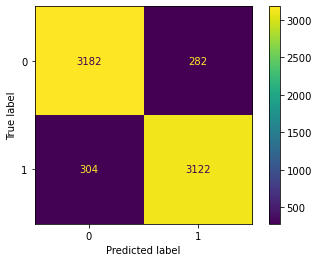

In [21]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
pred_svm=svc.predict(X_test)

Accuracy.append(accuracy_score(y_test,pred_svm))
Precision.append(precision_score(y_test,pred_svm , average = "macro"))
Recall.append(recall_score(y_test, pred_svm, average = "macro"))
Fscore.append(f1_score(y_test, pred_svm, average = "macro"))
print(classification_report(y_test, pred_svm))

cm = confusion_matrix(y_test, pred_svm, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)

disp.plot()
plt.show()

### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      3464
           1       0.82      0.85      0.83      3426

    accuracy                           0.83      6890
   macro avg       0.83      0.83      0.83      6890
weighted avg       0.83      0.83      0.83      6890



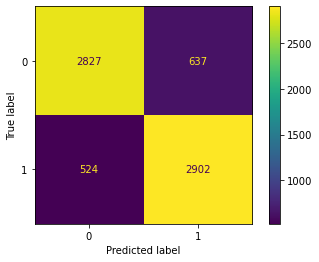

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(max_depth=150,random_state=0)
rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)

Accuracy.append(accuracy_score(y_test,pred_rf))
Precision.append(precision_score(y_test,pred_rf , average = "macro"))
Recall.append(recall_score(y_test, pred_rf, average = "macro"))
Fscore.append(f1_score(y_test, pred_rf, average = "macro"))
print(classification_report(y_test, pred_rf))


cm = confusion_matrix(y_test, pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

disp.plot()
plt.show()

### Ada Boost Classifier with base esitmator as Random Forest

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3464
           1       0.89      0.89      0.89      3426

    accuracy                           0.89      6890
   macro avg       0.89      0.89      0.89      6890
weighted avg       0.89      0.89      0.89      6890



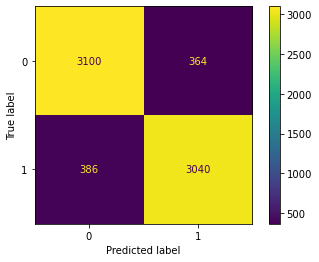

In [23]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=600,random_state=0)
abc.fit(X_train,y_train)
pred_abc=abc.predict(X_test)

Accuracy.append(accuracy_score(y_test,pred_abc))
Precision.append(precision_score(y_test,pred_abc , average = "macro"))
Recall.append(recall_score(y_test, pred_abc, average = "macro"))
Fscore.append(f1_score(y_test, pred_abc, average = "macro"))
print(classification_report(y_test, pred_abc))

cm = confusion_matrix(y_test, pred_abc, labels=abc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=abc.classes_)

disp.plot()
plt.show()

### Naive Bayes Classification

              precision    recall  f1-score   support

           0       0.70      0.66      0.68      3464
           1       0.67      0.71      0.69      3426

    accuracy                           0.69      6890
   macro avg       0.69      0.69      0.68      6890
weighted avg       0.69      0.69      0.68      6890



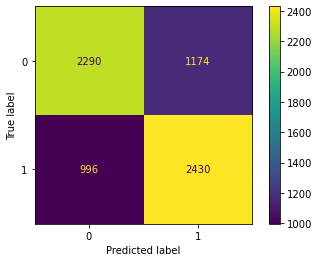

In [24]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb=gnb.predict(X_test)

Accuracy.append(accuracy_score(y_test,pred_gnb))
Precision.append(precision_score(y_test,pred_gnb , average = "macro"))
Recall.append(recall_score(y_test, pred_gnb, average = "macro"))
Fscore.append(f1_score(y_test, pred_gnb, average = "macro"))
print(classification_report(y_test, pred_gnb))

cm = confusion_matrix(y_test, pred_gnb, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)

disp.plot()
plt.show()

### Extra Trees Classifier

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      3464
           1       0.83      0.86      0.84      3426

    accuracy                           0.84      6890
   macro avg       0.84      0.84      0.84      6890
weighted avg       0.84      0.84      0.84      6890



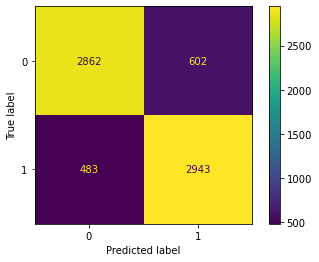

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

exclf = ExtraTreesClassifier(n_estimators=400,random_state=0)
exclf.fit(X_train,y_train)
pred_exclf=exclf.predict(X_test)

Accuracy.append(exclf.score(X_test,y_test))
Precision.append(precision_score(y_test,pred_exclf , average = "macro"))
Recall.append(recall_score(y_test, pred_exclf, average = "macro"))
Fscore.append(f1_score(y_test, pred_exclf, average = "macro"))
print(classification_report(y_test, pred_exclf))

cm = confusion_matrix(y_test, pred_exclf, labels=exclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=exclf.classes_)

disp.plot()
plt.show()

### K Neighbors Classifier

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      3464
           1       0.75      0.77      0.76      3426

    accuracy                           0.76      6890
   macro avg       0.76      0.76      0.76      6890
weighted avg       0.76      0.76      0.76      6890



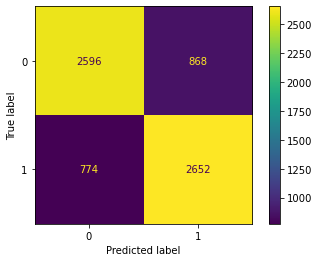

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)

Accuracy.append(accuracy_score(y_test,pred_knn))
Precision.append(precision_score(y_test,pred_knn , average = "macro"))
Recall.append(recall_score(y_test, pred_knn, average = "macro"))
Fscore.append(f1_score(y_test, pred_knn, average = "macro"))
print(classification_report(y_test, pred_knn))

cm = confusion_matrix(y_test, pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)

disp.plot()
plt.show()

### Logisitc Regression

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3464
           1       0.90      0.89      0.90      3426

    accuracy                           0.90      6890
   macro avg       0.90      0.90      0.90      6890
weighted avg       0.90      0.90      0.90      6890



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


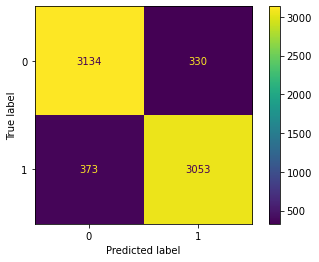

In [27]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)

Accuracy.append(lr.score(X_test,y_test))
Precision.append(precision_score(y_test,pred_lr , average = "macro"))
Recall.append(recall_score(y_test, pred_lr, average = "macro"))
Fscore.append(f1_score(y_test, pred_lr, average = "macro"))
print(classification_report(y_test, pred_lr))

cm = confusion_matrix(y_test, pred_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)

disp.plot()
plt.show()

### Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      3464
           1       0.79      0.80      0.79      3426

    accuracy                           0.79      6890
   macro avg       0.79      0.79      0.79      6890
weighted avg       0.79      0.79      0.79      6890



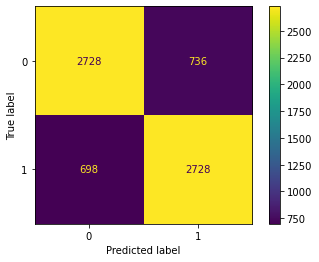

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy",random_state=0)
dt.fit(X_train, y_train)
pred_dt=dt.predict(X_test)

Accuracy.append(dt.score(X_test,y_test))
Precision.append(precision_score(y_test,pred_dt , average = "macro"))
Recall.append(recall_score(y_test, pred_dt, average = "macro"))
Fscore.append(f1_score(y_test, pred_dt, average = "macro"))
print(classification_report(y_test, pred_dt))

cm = confusion_matrix(y_test, pred_dt, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)

disp.plot()
plt.show()

### ROC curve for performance of algorithms after feature reduction

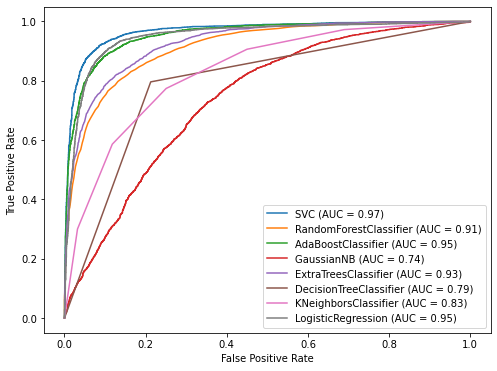

In [29]:
from sklearn.metrics import plot_roc_curve

plt.rcParams["figure.figsize"] = (8, 6)
disp=plot_roc_curve(svc, X_test, y_test)
plot_roc_curve(rf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(abc, X_test, y_test, ax=disp.ax_)
plot_roc_curve(gnb, X_test, y_test, ax=disp.ax_)
plot_roc_curve(exclf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(dt, X_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, X_test, y_test, ax=disp.ax_)
plot_roc_curve(lr, X_test, y_test, ax=disp.ax_)

### Precision Vs Recall graph for algorithms after feature reduction

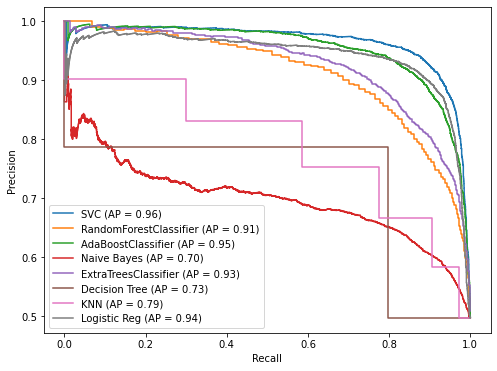

In [30]:
from sklearn.metrics import plot_precision_recall_curve

plt.rcParams["figure.figsize"] = (8, 6)
display = plot_precision_recall_curve(svc, X_test, y_test,name="SVC")
plot_precision_recall_curve(rf,X_test, y_test, name="RandomForestClassifier",ax=display.ax_)
plot_precision_recall_curve(abc,X_test, y_test, name="AdaBoostClassifier",ax=display.ax_)
plot_precision_recall_curve(gnb,X_test, y_test, name="Naive Bayes",ax=display.ax_)
plot_precision_recall_curve(exclf,X_test, y_test, name="ExtraTreesClassifier",ax=display.ax_)
plot_precision_recall_curve(dt,X_test, y_test, name="Decision Tree",ax=display.ax_)
plot_precision_recall_curve(knn,X_test, y_test, name="KNN",ax=display.ax_)
plot_precision_recall_curve(lr,X_test, y_test, name="Logistic Reg",ax=display.ax_)

In [31]:
Algorithms=['Support Vectors','Random Forest','Ada Boost','Naive Bayes','Extra Trees','KNN','Logistic Regression','Decision Tree']
metrix=pd.DataFrame(list(zip(Algorithms,Accuracy,Precision,Recall,Fscore)),columns=['Algorithms','Accuracy','Precision','Recall','F1_score'])
metrix.round(4)

Algorithms  Accuracy  Precision  Recall  F1_score
0      Support Vectors    0.9149     0.9150  0.9149    0.9149
1        Random Forest    0.8315     0.8318  0.8316    0.8315
2            Ada Boost    0.8911     0.8912  0.8911    0.8911
3          Naive Bayes    0.6851     0.6856  0.6852    0.6849
4          Extra Trees    0.8425     0.8429  0.8426    0.8425
5                  KNN    0.7617     0.7619  0.7618    0.7617
6  Logistic Regression    0.8980     0.8980  0.8979    0.8980
7        Decision Tree    0.7919     0.7919  0.7919    0.7919